# **Praktikum Data Mining 3**
## **Alber Analafean**
## **121450146 -RC**

[link Collab](https://colab.research.google.com/drive/1KEXWmFKWSx0nHdDaijv4bJgWNlB30J_F?usp=sharing)

# **Soal a**

## P1 : Metode PCA dan LDA

In [1378]:
import pandas as pd #digunakan dalam import data dan manipulasi data
from sklearn.preprocessing import StandardScaler #digunakan untuk data processing
TT_df = pd.read_csv("HarryPotterTT.csv") #memanggil dataset
TT_df #menampilkan dataset

,Name,Magic,Cunning,Courage,Wisdom,Temper
0,'Harry Potter',62,21,42,26,7
1,'Hermione Granger',60,16,40,73,2
2,'Ron Weasley',45,14,40,22,4
3,'Prof. Dumbledore',105,24,39,82,0
4,'Prof. Snape',85,24,19,71,7
5,'Prof. McGonagail',95,19,29,76,5
6,'Prof. Moody',82,20,35,69,5
7,'Rubeus Hagrid',12,11,30,8,7
8,'Fred Weasley',87,13,30,22,4
9,'George Weasley',87,13,30,22,4


### Principal Component Analysis using the PCA implementation in scikit-learn.

In [1377]:
import matplotlib.pyplot as plt #package digunakan untuk visualisasi data
%matplotlib inline
import numpy as np #pacakage yang digunakan untuk memmbuat array & perhitungan komputasi
import pandas as pd #pacakage yang digunakan dalam import dataset
from sklearn import datasets #package memanggil dataset
from sklearn.decomposition import PCA #memanggil fungsi PCA
from sklearn.preprocessing import StandardScaler #memanggil fungsi standarscaler

In [1379]:
#Ekstrak data
y = TT_df.pop('Name').values #menampilkan value pada fitur Name merupakan y
X= TT_df.values # x adalah values pada datagram TT
X_scal =StandardScaler().fit_transform(X) #ditransformasikan fitur X
X.shape #bentuk hasil shape

(22, 5)

In [1380]:
#Apply PCA
n_components=4
pcaHP = PCA(n_components) #memanggil fungsi pca dengan n componen sebanyak 4
X_r = pcaHP.fit(X_scal).transform(X_scal) #dilakukan transfrom dengan fitur  pcaHP dengan argumen X_scal
pcaHP.explained_variance_ratio_ #menampilkan arrary variansi rasio pcaHP

array([0.48877025, 0.31551511, 0.10842469, 0.0501518 ])

In [1381]:
pcaHP.components_ #komponen pcaHp

array([[ 0.57407296,  0.40754714,  0.3846298 ,  0.57788956, -0.14983036],
       [ 0.10834723,  0.52231617, -0.44046049,  0.0043925 ,  0.72209553],
       [-0.27762934,  0.33155304,  0.76359223, -0.39624817,  0.27001634],
       [ 0.63573329, -0.55900795,  0.19114024, -0.25378831,  0.42709507]])

(0.0, 0.8)

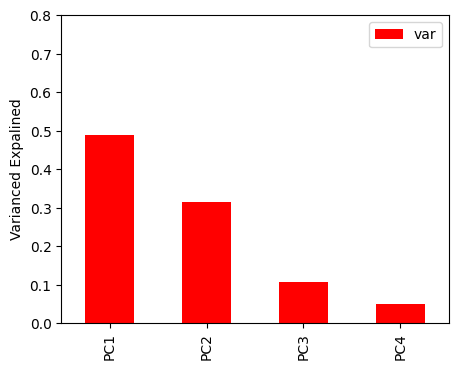

In [1382]:
#membuat plot untuk menampilkan rasio variansi
df= pd.DataFrame(pcaHP.explained_variance_ratio_, index=['PC1','PC2','PC3','PC4'], columns =['var']) #diatur data yang akan dimunculkan, index dan warna
pl =df.plot.bar(color='red', figsize=(5,4)) #diatur bar plot nya
pl.set_ylabel("Varianced Expalined") #diberi label
pl.set_ylim([0,0.8])  #diatur batas koordinat y

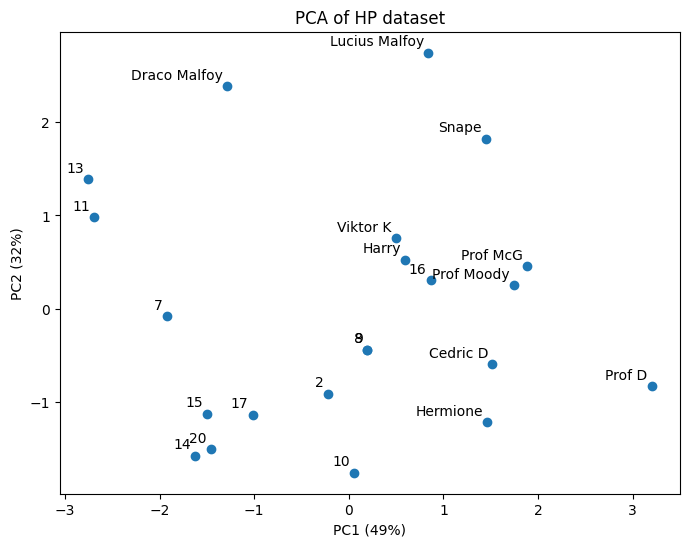

In [1383]:
#Plot persebaran data dengan PC1 dan PC2
#dibuat visualisasi untuk menampilkan hasil PCA

plt.figure(figsize=(8,6)) #diautr figsize
lw=2 #diatur lw = 2
labels =list(range(len(y))) #diatur label adalah list pada range panjang y
labels[0]='Harry'              #memberi label setiap urutan list
labels[1]='Hermione'             #memberi label setiap urutan list
labels[3]='Prof D'  #memberi label setiap urutan list
labels[5]='Prof McG'              #memberi label setiap urutan list
labels[6]='Prof Moody' #memberi label setiap urutan list
labels[18]= 'Cedric D' #memberi label setiap urutan list
labels[19]='Viktor K' #memberi label setiap urutan list
labels[21]='Lucius Malfoy'  #memberi label setiap urutan list
labels[4]='Snape' #memberi label setiap urutan list
labels[12]='Draco Malfoy' #memberi label setiap urutan list

plt.scatter(X_r[:,0], X_r[:,1]) #membuat plot scatter pca
for label, xi, yi in zip(labels, X_r[:,0], X_r[:,1]): #diplotkan label, xi, yi secara loop
  plt.annotate(
      label, xy=(xi,yi), xytext=(-3,3),
      textcoords='offset points' , ha='right', va='bottom') #diatur untuk memberi label pada stiap scatter plot
plt.xlabel('PC1 (49%)') #diatur label pada koordinat x
plt.ylabel('PC2 (32%)') #diatur label pada koordinat x
plt.title('PCA of HP dataset') #diatur judul plot
plt.show() #menampilkan plot hasil pca


### Linear Discriminant Analysis using the LDA implementation in scikit-learn.

In [1384]:
#mport Packages package yang akan digunakan
import pandas as pd #package digunakan untuk memanipulasi data
import numpy as np #package yang digunakan untuk komputasi numerik
from sklearn.model_selection import train_test_split #package yang digunakan untuk model selection dengan fungsi split data
from collections import Counter #digunakan dalam menghitung sebuah distribusi suatu kelas
from sklearn.preprocessing import StandardScaler #fungsi digunakan untuk melakukan standarisasi skalar dengan library sklearn.prepocessing
from sklearn.metrics import accuracy_score #package menghitung nilai metrik dengan mengunakan fungsi skor akurasi
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #package yang digunakan untuk analisis diskriminan dengan fungsi Lda
from sklearn.decomposition import PCA #package yang digunakan untuk dekomposisi dengan fungsi pca
import matplotlib.pyplot as plt #untuk memvisualisasikan model
%matplotlib inline

In [1385]:
#Import dataset
penguins_df = pd.read_csv('penguins.csv',index_col=0) #import dataset dengan pandas
y = penguins_df.pop('species').values #menghapus fitur species di penguins_df
X_raw= penguins_df.values #merupakan nilai data penguins_df

X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, random_state=1, test_size=1/2) #dilakukan split data

scaler= StandardScaler() #dilakukan standarisasi skalar
X_train= scaler.fit_transform(X_tr_raw) #dilakukan transform fitur scaler dengan X_tr_raw untuk X_train
X_test= scaler.fit_transform(X_ts_raw) #dilakukan transform fitur scaler dengan X_tr_raw untuk X_test

feature_names= penguins_df.columns #feature_names adalah kolom di penguins_df
print(penguins_df.shape) #menampilkan dimensi penguins_df
penguins_df.head() #menampilkan beberapa baris penguins_df


(333, 4)


,bill_length,bill_depth,flipper_length,body_mass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [1386]:
types= list(Counter(y).keys()) #Menampilkan data y
types

['Adelie', 'Gentoo', 'Chinstrap']

In [1387]:
#Apply LDA
lda=LinearDiscriminantAnalysis() #dipanggil fungsi lda dengan variabel lda
lda.fit(X_train, y_train) #dilakukan training model dengan data train
X_tr_lda = lda.transform(X_train) #dilakukan transform lda dengan X_train
X_tr_lda.shape #menampilkan ukuran X_tr_lda

(166, 2)

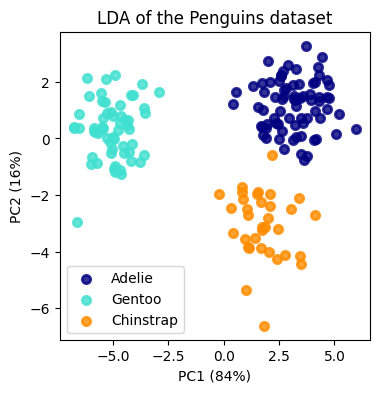

In [1388]:
#Plot LDA

plt.figure(figsize=(4,4)) #mengatur ukuran figur
colors= ['navy', 'turquoise', 'darkorange'] #mengatur warna
lw=2 #diatur lw=2

for color, target_name in zip(colors, types): #dilakukan looping pada color dan target name yang akan divisualisasikan
  plt.scatter(X_tr_lda[y_train == target_name,0], X_tr_lda[y_train == target_name, 1],
              color= color, alpha=.8, lw=lw, label=target_name) #dibuat plot scatter

plt.legend(loc='best', shadow=False, scatterpoints=1) #mengatur legend
plt.xlabel('PC1 (84%)') #mengatur label x
plt.ylabel('PC2 (16%)') #mengatur label y
plt.title('LDA of the Penguins dataset') #mengatur judul plot
plt.show() #menampilkan plot

In [1389]:
#Hitung akurasi
y_pred = lda.predict(X_test) #memprediksi dengan lda
accuracy_score(y_pred, y_test) #hitung akurasi dari nilai y prediksi dan y test

0.9760479041916168

In [1390]:
#Penggunaan PCA
pca= PCA(n_components=4) #dipanggil fungsi pca dengan n komponen=4
X_tr_pca= pca.fit(X_train).transform(X_train) #dilakukan train model &transform pada X_train

pca.explained_variance_ratio_ #ditampilkan hasilnya

array([0.67991833, 0.20387145, 0.08721252, 0.0289977 ])

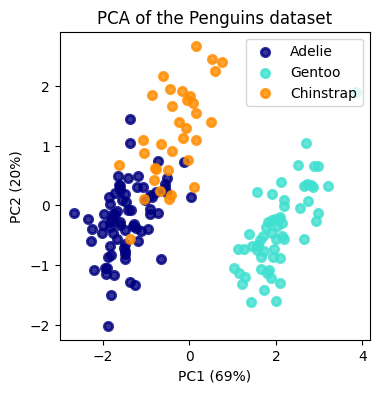

In [1391]:
#Plot PCA untuk perbandingan
plt.figure(figsize=(4,4)) #mengatur ukuran figur
lw=2 #Mmengatur lw=2

for color, target_name in zip(colors, types): #dilakukan looping pada color dan target name yang akan divisualisasikan
  plt.scatter(X_tr_pca[y_train == target_name,0], X_tr_pca[y_train == target_name, 1],
              color= color, alpha=.8, lw=lw, label=target_name) #dibuat plot scatter

plt.legend(loc='best', shadow=False, scatterpoints=1) #mengatur legend
plt.xlabel('PC1 (69%)') #mengatur label x
plt.ylabel('PC2 (20%)') #mengatur label y
plt.title('PCA of the Penguins dataset') #mengatur judul plot
plt.show() ##menampilkan plot

## P2 : Metode Filter

### Feature Selection using Filters

In [1392]:
#Import Packages
import pandas as pd #digunakan dalam memanipulasi data
import numpy as np #difgunakan dalam komputasi numerik
from sklearn.feature_selection import chi2, mutual_info_classif #digunakan untuk menghitung chi, informasi mutual classif
from sklearn.model_selection import train_test_split #untuk melakukan split data
from sklearn.preprocessing import MinMaxScaler #untuk penskalaran fitur
from sklearn.model_selection import cross_val_score #untuk menhitung cross validation dengan berbagai metrik
import matplotlib.pyplot as plt #untuk membuat plot model


In [1393]:
#Import dataset
seg_data = pd.read_csv('segmentation-all.csv') #import dataset format csv dengan pandas
print(seg_data.shape) #ditampilkan dimensi data (baris,kolom(fitur))
seg_data.head() #menampilkan beberapa data

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140,125,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188,133,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105,139,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34,137,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39,111,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [1394]:
seg_data['Class'].value_counts() #Mengitung data pada variabel target(class)

BRICKFACE    330
SKY          330
FOLIAGE      330
CEMENT       330
WINDOW       330
PATH         330
GRASS        330
Name: Class, dtype: int64

In [1395]:
# Split data
y= seg_data.pop('Class').values #y merupakan menghapus fitur class pada dataset dan diekstrak nilainya menjadi numerik
X_raw = seg_data.values #X_raw adalah nilai seg_data

X_tr_raw, X_ts_raw, y_train,y_test = train_test_split(X_raw, y, random_state=1, test_size=1/2) #dilakukan split data dengan random state-1 dan ukuran test 1/2
scaler= MinMaxScaler() #dilakukan penskalaan fitur
X_train= scaler.fit_transform(X_tr_raw)  #dilakukan pembuatan nilai x train untuk model
X_test= scaler.transform(X_ts_raw) #dilakukan pembuatan nilai x test untuk model

feature_names= seg_data.columns #memanggil fitur pada seg_data
X_train.shape, X_test.shape #ditampilkan dimensi pada setiap fitur train dan test

((1155, 19), (1155, 19))

In [1396]:
#Feature Scores
chi2_score, pval= chi2(X_train, y_train) #dilakukan perhitungan chi
chi2_score = np.nan_to_num(chi2_score) #menggantu nilai nan ke nol pada chi2_score
chi2_score #menampilkan skor chi

array([ 14.99569813, 114.86161054,   0.        ,  13.47060858,
        27.33137409,  14.52455789,  20.00650221,  17.74732567,
        15.4768292 , 293.4360061 , 290.96380025, 303.47783064,
       290.11739498,  54.25395182, 111.01924229,  92.91780859,
       287.66891553,  81.64654774, 268.86221356])

In [1397]:
i_scores =mutual_info_classif(X_train, y_train) #menghitung skor info pada setiap fitur
i_scores #menampilkan i_scores

array([0.13816308, 0.96175963, 0.03149223, 0.00813635, 0.0529967 ,
       0.48921215, 0.31854364, 0.45597736, 0.35954075, 1.15734109,
       1.214848  , 1.10291234, 1.13441423, 0.76002743, 0.91825106,
       0.96862477, 1.13711101, 0.92763429, 1.12948606])

In [1398]:
# Simpan skor
df= pd.DataFrame({'Mutual info.': i_scores,'Chi Square':chi2_score,'Feature':feature_names}) #lalu nilai yang diperoleh disimpan dalam sebuh dataframe
df.set_index('Feature', inplace = True) #diatur index berdasarkan fitur
df.sort_values('Mutual info.', inplace=True, ascending=False) #dataframe diurutkan berdasarkan mutual info
df #menampilkan df

,Mutual info.,Chi Square
Feature,,
RAWRED-MEAN,1.214848,290.963800
INTENSITY-MEAN,1.157341,293.436006
VALUE-MEAN,1.137111,287.668916
RAWGREEN-MEAN,1.134414,290.117395
HUE-MEAN,1.129486,268.862214
RAWBLUE-MEAN,1.102912,303.477831
EXGREEN-MEAN,0.968625,92.917809
REGION-CENTROID-ROW,0.961760,114.861611
SATURATION-MEAN,0.927634,81.646548


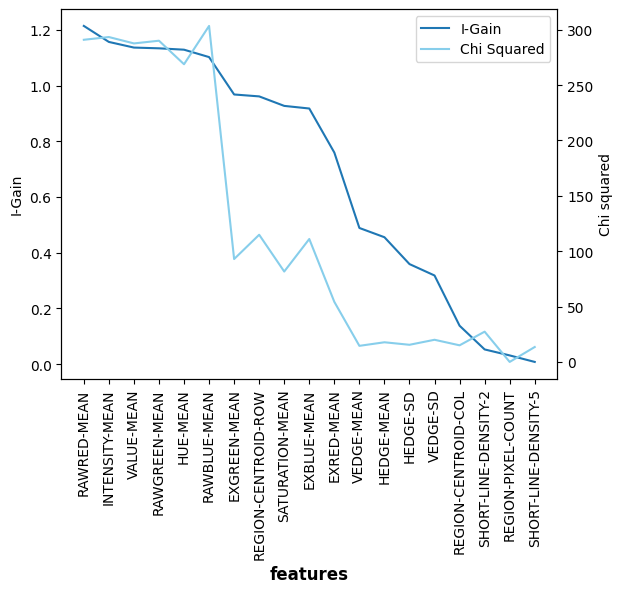

In [1399]:
#plot filter score
fig, ax= plt.subplots() #mengatur subplots
rr= range(0,len(feature_names)) #menentukan rr merupakan range 0 hingg panjang fitur
ax2= ax.twinx() #membuat axis2
ax.plot(df.index, df['Mutual info.'], label='I-Gain') #membuat plot ax
ax2.plot(df.index, df['Chi Square'], label='Chi Squared', color='skyblue') #membuat plot ax2
ax.set_xticks(rr) #menunjukkax tanda sumbu pada rr

ax.set_xticklabels(list(df.index), rotation=90) #mengatur label pada sumbu x
ax.set_xlabel('features', fontsize=12, fontweight='bold') #mengaturlabel pada sumbu x dengan ukuran font,
ax.set_ylabel('I-Gain') #mengaturlabel pada sumbu y
ax2.set_ylabel('Chi squared') #mengaturlabel pada sumbu y
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax.transAxes) #menambahkan legend

In [1400]:
#Hitung korelasi
from scipy import stats #memanggil stats dri library scipy
stats.spearmanr(chi2_score, i_scores) #menampilkan statistik spearman

SignificanceResult(statistic=0.9105263157894736, pvalue=6.24664266313421e-08)

### Correlation Based Feature Selection (CFS)


In [1401]:
# Import Packages
import pandas as pd #untuk memanipulasi data
import numpy as np #untuk komputasional numerik
from sklearn.model_selection import train_test_split #untuk melbkukan split data
from sklearn.preprocessing import MinMaxScaler #untuk penskalaran fitur
from sklearn.neighbors import KNeighborsClassifier #untuk melakukan proses KNN pada problem klasifikasi
from sklearn.metrics import accuracy_score #untuk mengetahui skor akurasi
from sklearn.model_selection import cross_val_score #untuk mengetahui skor cross validation
import matplotlib.pyplot as plt #untuk membuat visualisasi plot pada model
from matplotlib.ticker import MaxNLocator #untuk mengatur titik sumbu pada plot


In [1402]:
from CFS import cfs, merit_calculation #untuk membuvt CFS dan menghitung korelasi fitur
from CFS_ForwardSearch import CFS_FS #untuk membuat CFS FS

In [1403]:
seg_data = pd.read_csv('segmentation-all.csv') #import dataset yang digunakan
print(seg_data.shape)#menampilkvn dimensi data
seg_data.head() #menampilkan beberapa data

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140,125,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188,133,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105,139,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34,137,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39,111,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [1404]:
y = seg_data.pop('Class').values  #y merupakan menghapus fitur class pada dataset dan diekstrak nilainya menjadi numerik
X_raw = seg_data.values #x_raw adalah merupakan nilai seg_data
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                       random_state=2, test_size=1/2) #dilakukan split data
scaler = MinMaxScaler() #dilakukan penskalaan fitur
X_train = scaler.fit_transform(X_tr_raw) #membuat data x train(latih)
X_test = scaler.transform(X_ts_raw) #memmbuat data x test(uji)
max_length = X_train.shape[0] #mengukur panjang maksimum dengan cek ukurvn pada X_train dri 0
feat_num = X_train.shape[1] #menentukan nilai feat dengan cej ukuran pada X_train
X_train.shape, X_test.shape #menampilkan dimensi data X_train dan X_test

((1155, 19), (1155, 19))

In [1405]:
kNN = KNeighborsClassifier(n_neighbors=5) #dilakukan KNN dengan banyak neighbors yaitu 5
kNN = kNN.fit(X_train,y_train) #dilakukan KNN pada X_train dan Y_train
y_pred = kNN.predict(X_test) #dcari nilai Y prediksi dengan X_test
acc = accuracy_score(y_pred,y_test) #dihitung skor akurasi dengn y prediksi dan y test
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8) #dihitung skor Cross validation dengan cv diatur = 8

print("X_Val on training all features: {0:.3f}".format(cv_acc.mean())) #menampilka nilai X validation ditraining pada semua fitur
print("Hold Out testing all features: {0:.3f}".format(acc)) #menampilkn nilai Hold-Out ditesting pada semua

X_Val on training all features: 0.946
Hold Out testing all features: 0.940


#### Forward Search - CFS

In [1406]:
merit_score_sel, sel_comb = CFS_FS(X_train, y_train) #dilakukan CFS_FS deng mengunakan data training sebagai variabel merit_score_sel, sel_comb
print("Merit Score of Selected Features: " + str(merit_score_sel.values[0])) #ditampilkan nilai merit score fitur yang diseleksi
print("Selected Feature index: " + str(sel_comb)) #menampilkan indeks fitur seleksi

Merit Score of Selected Features: [0.43951449 0.44021037]
Selected Feature index: (17, 18)


In [1407]:
# Print the selected features
feature_names_sel = seg_data.columns[np.array(sel_comb)] #dipanggil feature_names_sel yang merupakan kolom pada seg_data merupakan array padv sel_comb
feature_names_sel #menampilkvn fitur seleksi dan tipe datanya

Index(['SATURATION-MEAN', 'HUE-MEAN'], dtype='object')

In [1408]:
X_train_CFS_FS = X_train[:,sel_comb] #dibuat data x train CFS FS
X_test_CFS_FS = X_test[:,sel_comb] #dibuat data X test CFS FS

kNN_CFS_FS = kNN.fit(X_train_CFS_FS,y_train) #lalu ditrain model dengan fungsi kNN.fit dengan argumen X_train_CFS_FS & y_train

y_pred = kNN_CFS_FS.predict(X_test_CFS_FS) #lalu dilakukan prediksi pada model dengan kNN_CFS_FS.predict dengan argumen disimpan pada y_pred
acc_CFS_FS = accuracy_score(y_pred,y_test) #lalu dihitung skor akurasi dengan accuracy_score dengan y_pred & y_test disimpan pada variabel acc_CFS_FS
cv_acc_CFS_FS = cross_val_score(kNN_CFS_FS, X_train_CFS_FS, y_train, cv=8) #lalu dilakukan cross validation yang mengunakan cv= 8 dengan argumen kNN_CFS_FS, X_train_CFS_FS & y_train

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS_FS.mean())) #lalu ditampilkan nilai X validation ditraining fitur seleksi
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS_FS)) #laly ditampilkan holdout ditesting fitur seleksi

X_Val on training selected features: 0.874
Hold Out testing selected features: 0.847


#### Best First Search - CFS

In [1409]:
Sel_feat = cfs(X_train,y_train) #variabel Sel_feat dilakukan fungsi cfs dengan argumen X_train & y_train
Sel_feat = Sel_feat[Sel_feat!=-1] #dilakukan pengecekan untuk sel_feat bernilai -1, tidak ditampikan
Sel_feat #ditampilkan nilainya

array([17, 18,  8,  6, 10,  9])

In [1410]:
# Print the names of the features selected
feature_names_sel = seg_data.columns[Sel_feat] #memanggil kolom seg_data dimana fiturnya adalah sel_feat
feature_names_sel #menampilkan fitur yang diseleksi

Index(['SATURATION-MEAN', 'HUE-MEAN', 'HEDGE-SD', 'VEDGE-SD', 'RAWRED-MEAN',
       'INTENSITY-MEAN'],
      dtype='object')

In [1411]:
# Find the merit score for the search space of the selected feature subsets
merit = [] #merit diawali merupakan list kosong
cv_acc_CFS = [] #cv_acc_CFS merupakan list kosong
for i in range(1,len(Sel_feat)+1): #dilakukan looping pada pengisian list kosong tadi
    X_train_CFS = X_train[:,Sel_feat[0:i]]  #X_train_CFS
    merit.insert(i, merit_calculation(X_train_CFS, y_train)) #ditambahkan hasil nilai i, kalkulasi meirit sebuah argumen ke list meirt
    kNN_CFS = kNN.fit(X_train_CFS,y_train) #dilakukan training kNN dengan argumen X_train_CFS,y_train
    cv_acc_CFS.insert(i,cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8).mean()) # ditambahkan hasil nilai i, skor cv pada argumen ke list cv_acc_CFSmcv_acc_CFS

merit #menampilkan skor merit

[0.43951448818147326,
 0.44021037374992716,
 0.43767125770380755,
 0.43619307358905546,
 0.43539938594841915,
 0.4339188253042891]

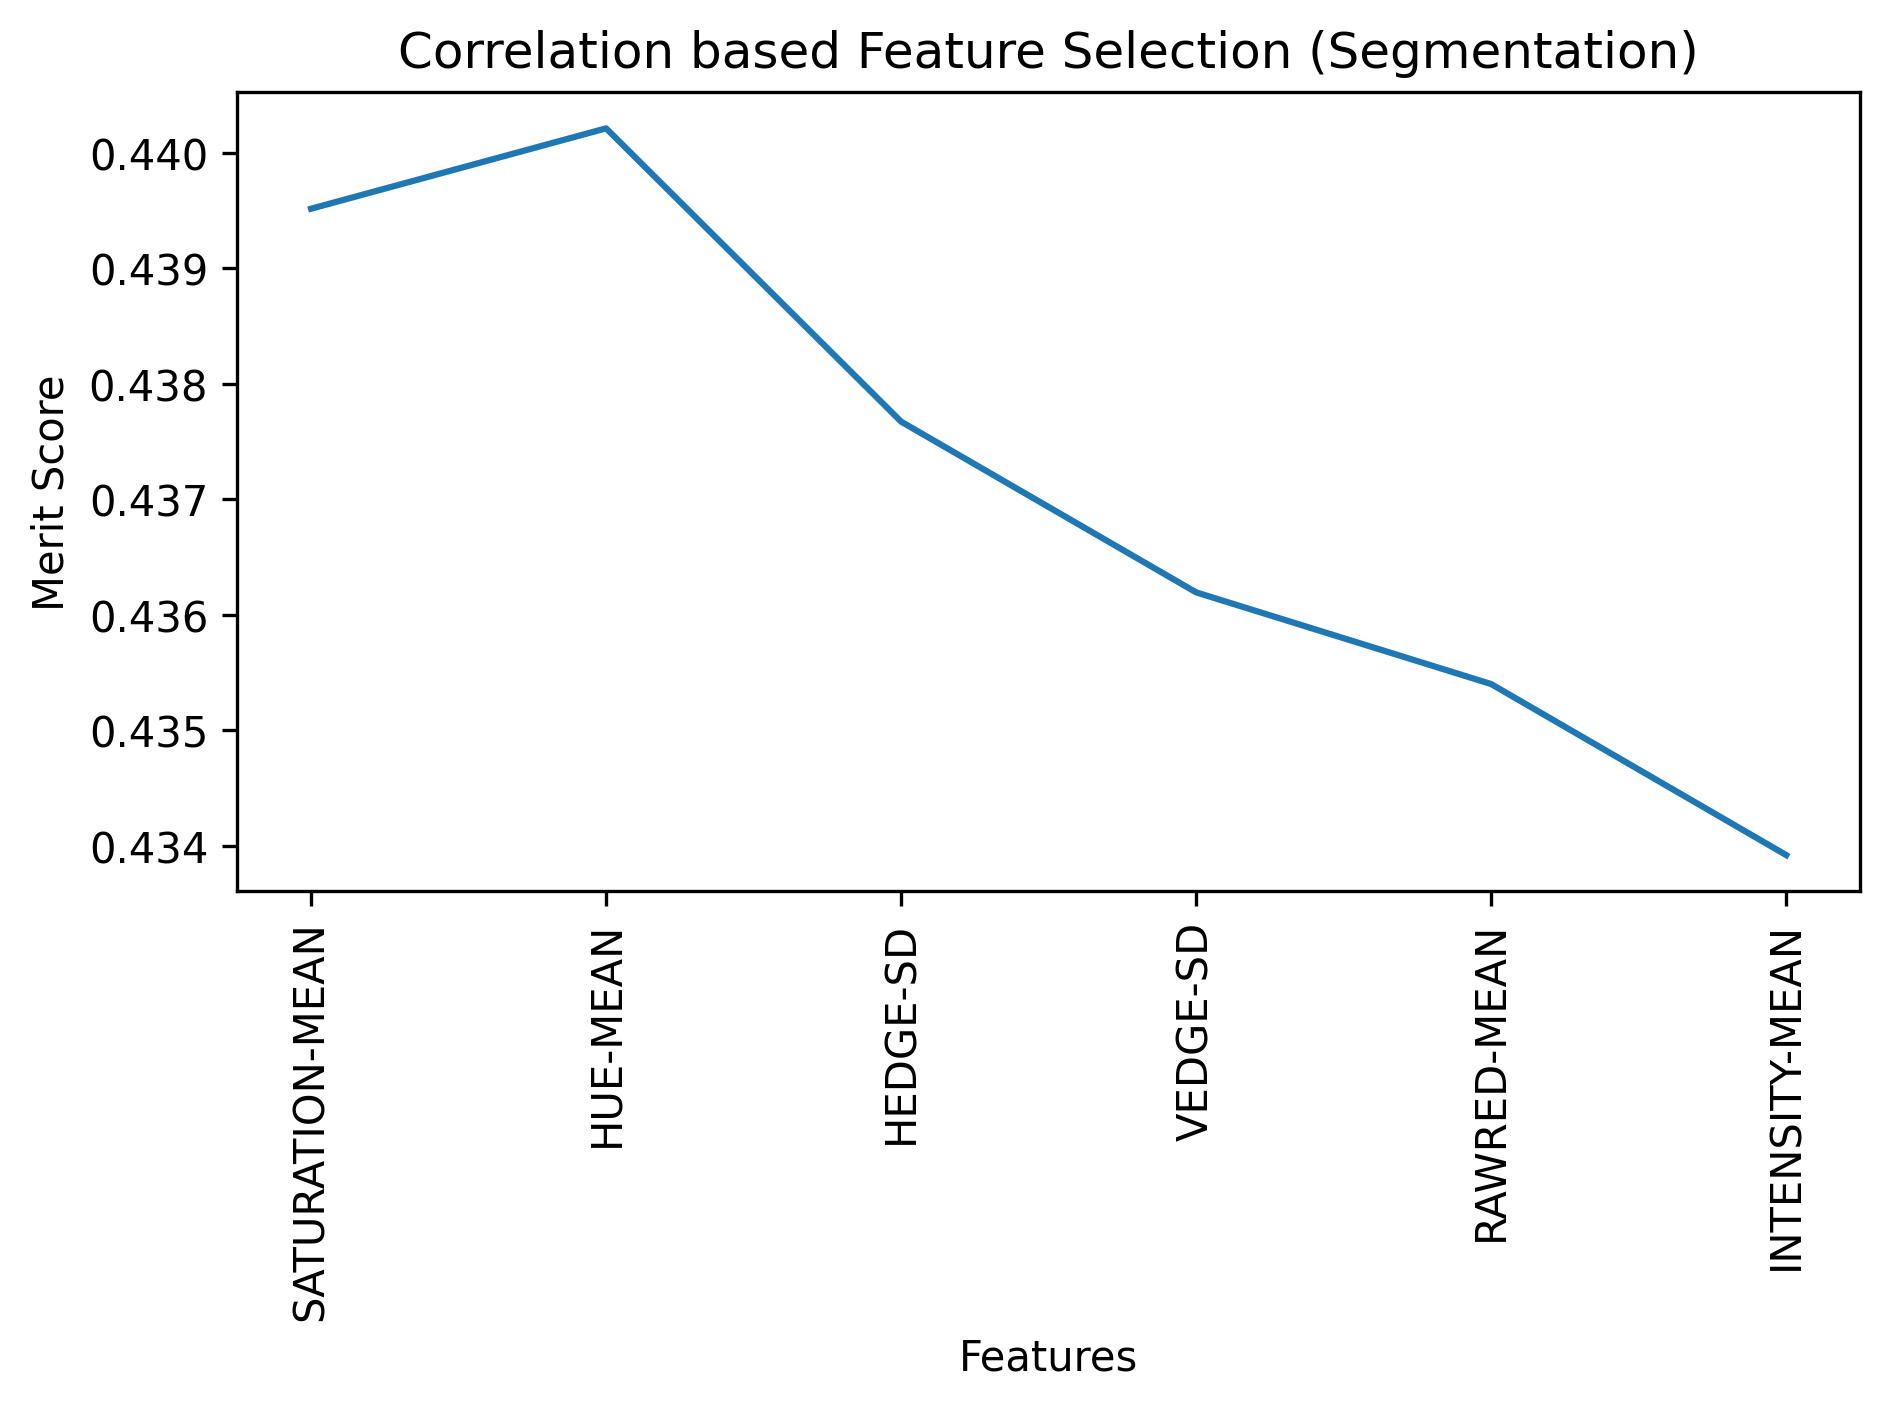

In [1412]:
# Plot merit score as features are added
f1 = plt.figure(dpi = 300) #diatur figur, dengan dpi =300
plt.plot(feature_names_sel, merit) #dipanggil data akan diplotkan yaitu feature_names_sel dan merit
plt.title("Correlation based Feature Selection (Segmentation)") #menampilkan judul plot
plt.xticks(rotation=90) #mengatur titik x
plt.xlabel("Features") #mengatur label x
plt.ylabel("Merit Score") #Mengatur label y
plt.tight_layout() #menampilkan plot

##### Evaluate on test data

In [1413]:
#dilakukan evaluasi data
X_test_CFS = X_test[:,Sel_feat] #dibuat X_test_CFS

kNN_CFS = kNN.fit(X_train_CFS,y_train) #dilakukan train kNN pada argumen data train

y_pred = kNN_CFS.predict(X_test_CFS) #dihitung y prediksi dengan mengunakan kNN_CFS.predict dengan argumen X_test_CFS

acc_CFS = accuracy_score(y_pred,y_test) #dihitung skor akurasi pada argumen kedua argumen y dengan gfungsi accuracy_score
cv_acc_CFS = cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8) #dihitung skor CV dengan fungsi cross_val_score dengan argumen kNN_CFS, X_train_CFS, y_train & diatur cv=8

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS.mean())) #ditampilkan nilai X Validation trainig
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS)) #ditampilkan nilai hold out testing

X_Val on training selected features: 0.900
Hold Out testing selected features: 0.887


##### Plot Results

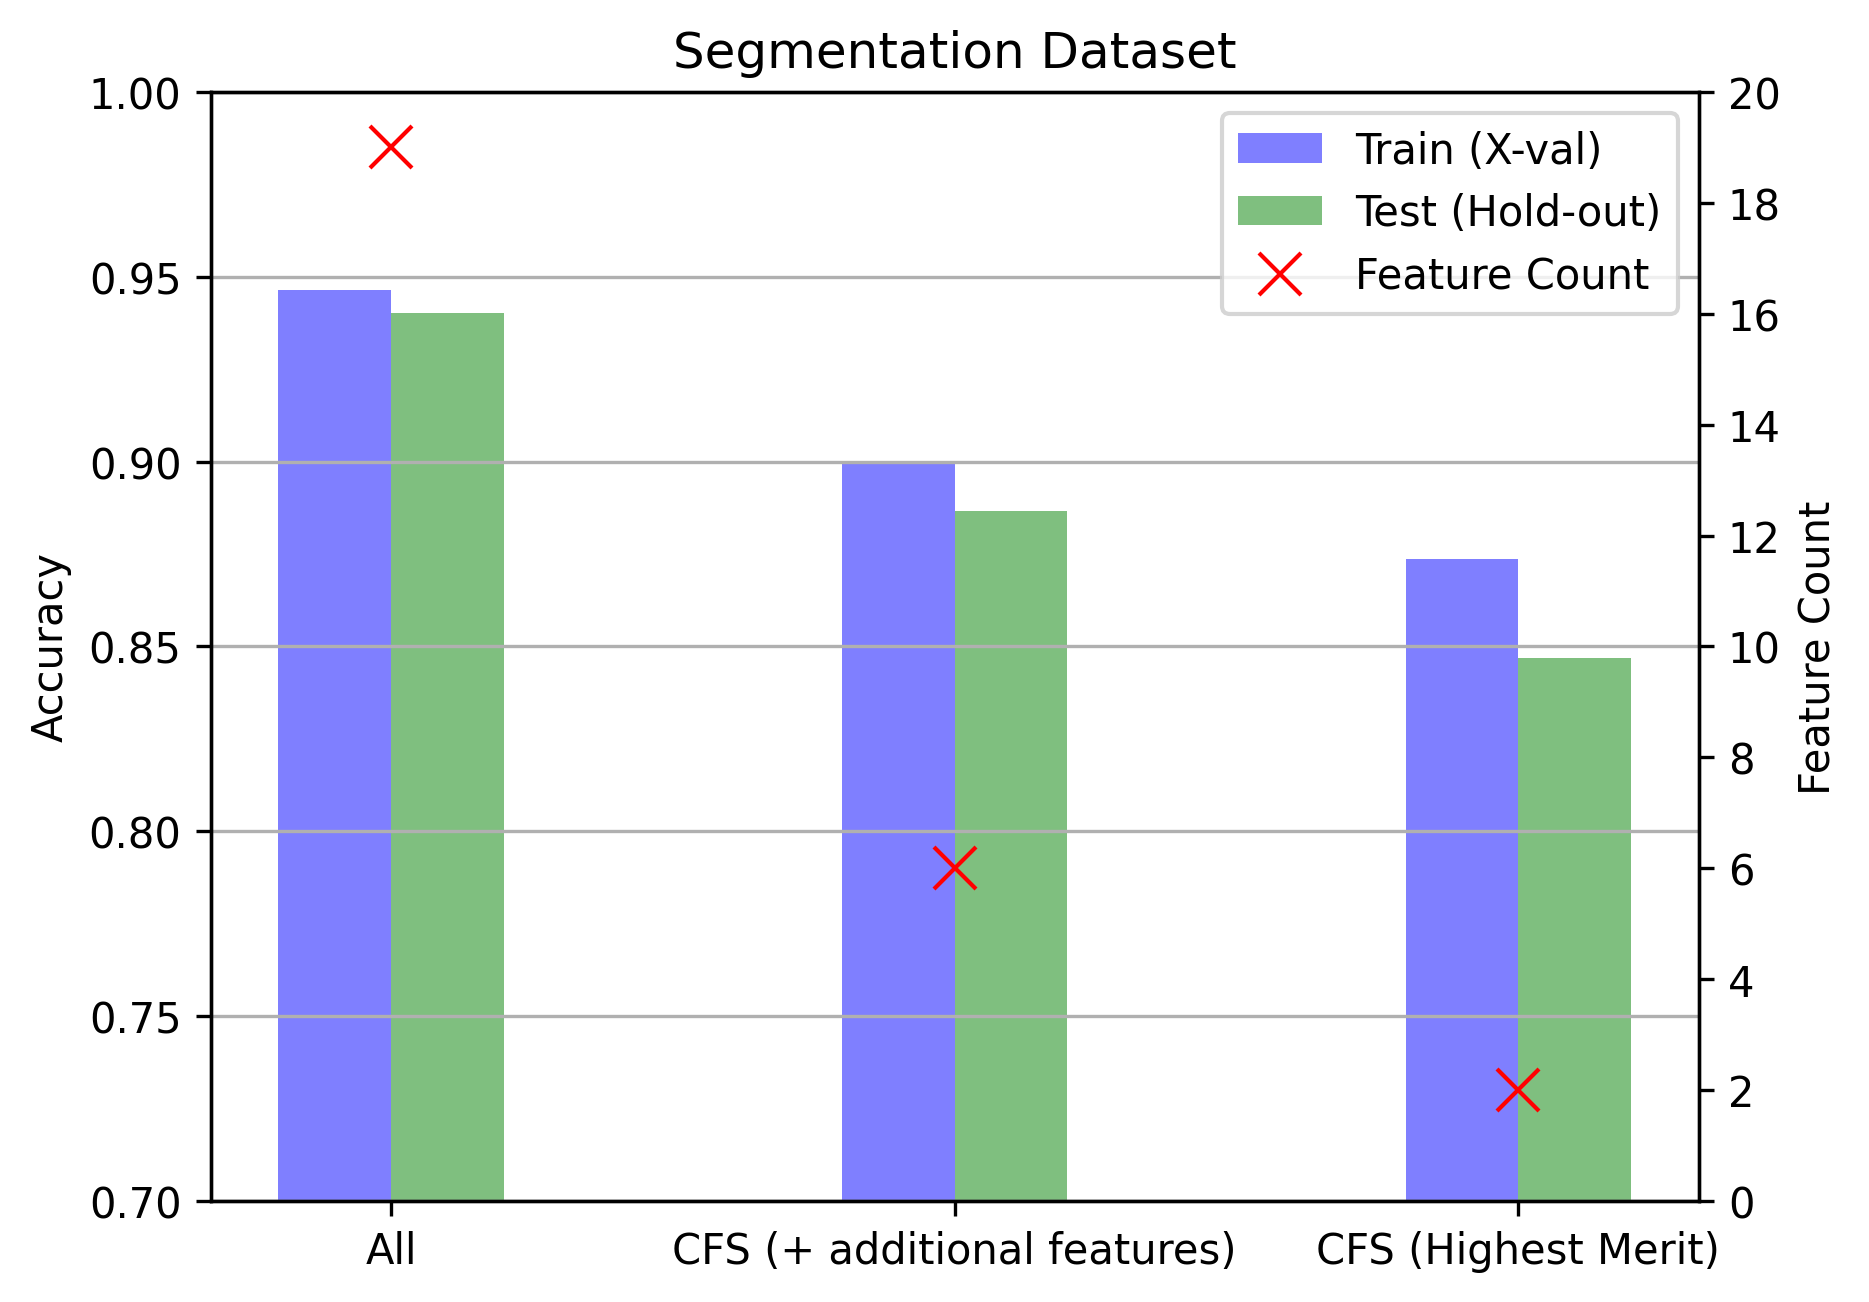

In [1414]:
fig, ax = plt.subplots(dpi = 300) #diatur figur dan axi dengan dpi=300
width = 0.2 #dengan lebar(width)= 0.2

options = ['All', 'CFS (+ additional features)', 'CFS (Highest Merit)'] #dibuat options untuk mengabung semua fitur model
n_feat = [X_train.shape[1], X_train_CFS.shape[1], X_train_CFS_FS.shape[1]] #dibuat n_feat berdasarkan data train dari  x-trai
accs = [acc,acc_CFS, acc_CFS_FS] #dibuat variabel menampilkan akurasi
xv = [cv_acc.mean(), cv_acc_CFS.mean(), cv_acc_CFS_FS.mean()] #dibuat variabek menampilkan cv

y_pos = np.arange(len(options))

p1 = ax.bar(y_pos-width/2, xv, width, align='center', label = 'Train (X-val)',
            color=['blue','blue','blue'],alpha=0.5) #mengatur axis bar 1
p2 = ax.bar(y_pos+width/2, accs , width, align='center', label = 'Test (Hold-out)',
            color=['g','g','g'],alpha=0.5) #mengatur axis bar 2

ax.set_ylim([0.7, 1]) #mengatur batas axis y
ax2 = ax.twinx() #merge axis x

p3 = ax2.plot([0,1,2],n_feat, color = 'red', label = 'Feature Count', marker = 'x', ms = 10, linewidth=0) #mengatur axis plot
ax2.set_ylim([0, 20]) #mengatur batas axis y

ax.grid(axis = 'y') #membuat grid pada plot yaitu axis= 'y'

h1, l1 = ax.get_legend_handles_labels() #diatur legend
h2, l2 = ax2.get_legend_handles_labels() #diatur legend
ax2.legend(h1+h2, l1+l2, loc = 'upper right') #diposisikan legend di atas kanan

ax2.yaxis.set_major_locator(MaxNLocator(integer=True)) #mengatur penempatan mayor pada sumbu y

plt.xticks(y_pos, options) #untuk mengatur titik x
ax.set_ylabel('Accuracy') #memberikan label sumbu y
ax2.set_ylabel('Feature Count') #memberikan label sumbu y lainnya
plt.title("Segmentation Dataset") #memberikan judul plot
plt.show() #menampilkan plot

## P3 : Metode Embedded (D-Tree)

In [1437]:
#Import Packages
from sklearn.tree import DecisionTreeClassifier #dipanggil package sklearn.tree dengan fungsi DecisionTreeClassifier untuk melakukan klasifikasi Decision Tree
from sklearn import tree #dipanggil sklearn dengan fungsi tree
from sklearn.model_selection import train_test_split #dipanggil package sklearn.model_selection dengan fungsi train_test_split untuk melakukan split data
from sklearn.model_selection import cross_val_score #dipanggil fungsi untuk menghitung skor CV
from sklearn.metrics import accuracy_score #dipanggil fungsi untuk menghitung skor akurasi
import matplotlib.pyplot as plt #library untuk memvisualisasikan model

In [1438]:
#Import dataset
penguins_df= pd.read_csv('penguins.csv', index_col = 0) #import dataset berformat csv dengan pandas
feature_names = penguins_df.columns #kolom pada penguins_df dinamakan feature_names
print(penguins_df.shape) #menampilkan dimensi dataset
penguins_df.head() #menampilkan beberapa baris dari dataset

(333, 5)


,bill_length,bill_depth,flipper_length,body_mass,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
3,36.7,19.3,193.0,3450.0,Adelie
4,39.3,20.6,190.0,3650.0,Adelie


In [1439]:
penguins_df['species'].value_counts() #Hitung data pada variabel target

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [1440]:
y =penguins_df.pop('species').values #y merupakan data yang dihapus fitur spesies dari penguins_df
X= penguins_df.values #x adalah nilai data pada penguins_df

X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=1, test_size=1/2) #dilakukan split data
feature_names = penguins_df.columns #kolom pada penguins_df merupakan feature_names
X_train.shape, X_test.shape #menampilkan ukuran pada data x (train&test)

((166, 4), (167, 4))

In [1441]:
ftree= DecisionTreeClassifier(criterion='entropy') #dilakukan klasifikasi pada decision tree dengan kriteria yaitu entropy
ftree= ftree.fit(X_train, y_train) #dilakukan training model ftree pada data train
y_pred=ftree.predict(X_test) #dibuat prediksi ftree dengan mengunakan X_test
acc= accuracy_score(y_pred, y_test) #mengukur skor akurasi pada y_pred dan y_tes
print("Test set accuract %4.2f" % (acc)) #menampilkan hasil akurasi test set

Test set accuract 0.93


[Text(0.6, 0.9, 'flipper_length <= 202.5\n166\n[74, 34, 58]\nAdelie'),
 Text(0.4, 0.7, 'bill_length <= 44.4\n103\n[74, 29, 0]\nAdelie'),
 Text(0.3, 0.5, 'bill_depth <= 16.65\n75\n[74, 1, 0]\nAdelie'),
 Text(0.2, 0.3, 'bill_length <= 39.5\n8\n[7, 1, 0]\nAdelie'),
 Text(0.1, 0.1, '7\n[7, 0, 0]\nAdelie'),
 Text(0.3, 0.1, '1\n[0, 1, 0]\nGentoo'),
 Text(0.4, 0.3, '67\n[67, 0, 0]\nAdelie'),
 Text(0.5, 0.5, '28\n[0, 28, 0]\nGentoo'),
 Text(0.8, 0.7, 'bill_depth <= 18.4\n63\n[0, 5, 58]\nChinstrap'),
 Text(0.7, 0.5, '58\n[0, 0, 58]\nChinstrap'),
 Text(0.9, 0.5, '5\n[0, 5, 0]\nGentoo')]

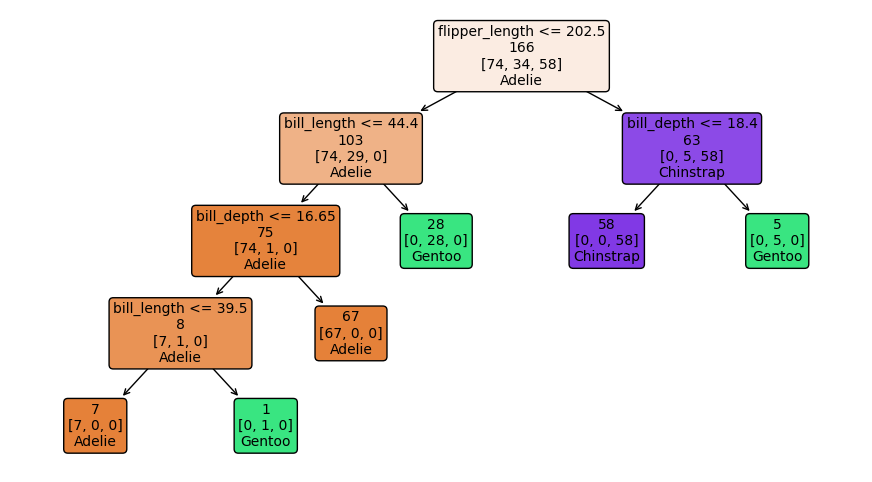

In [1442]:
plt.figure(figsize=(11,6)) #mengatur figur plot

tree.plot_tree(ftree, fontsize=10, feature_names=feature_names,
                      class_names=['Adelie','Gentoo', 'Chinstrap'],
                      label= 'none', filled=True, impurity= False,
               rounded= True) #membuat plot tree dengan mengatur fontsize, feature_names, label, impurity, filled, rounded

In [1443]:
fi = ftree.feature_importances_ #menampilkan importance fitur pada ftree

for fi_val, f_name in zip(fi,feature_names): #dilakukan loop pada fi validation dan f name dalam zip dengan argumen fi, feature_names
  print('%4.2f %s' % (fi_val,f_name)) #menampikan importance fitur

0.34 bill_length
0.11 bill_depth
0.55 flipper_length
0.00 body_mass


In [1444]:
ftree.get_n_leaves() #jumlah banyak leave pada ftree

6

Pruned Tree


In [1445]:
p_tree =DecisionTreeClassifier(criterion='entropy', max_leaf_nodes= 3) #dilakukab klasifikasi decision tree dengan kriteria entropy dengan leaf node maksimum diatur sebanyak 3
p_tree= p_tree.fit(X_train, y_train) #dilakukan training pada p_tree dengan data train
y_pred= p_tree.predict(X_test) #dilakukan prediksi dengan X_test
acc= accuracy_score(y_pred, y_test) #dihitung skor akurasi dengan y_pred & y_test
print("test set acuract %4.2f" % (acc)) #ditampilkan nilai test set akurasi

test set acuract 0.89


[Text(0.6, 0.8333333333333334, 'flipper_length <= 202.5\n166\n[74, 34, 58]\nAdelie'),
 Text(0.4, 0.5, 'bill_length <= 44.4\n103\n[74, 29, 0]\nAdelie'),
 Text(0.2, 0.16666666666666666, '75\n[74, 1, 0]\nAdelie'),
 Text(0.6, 0.16666666666666666, '28\n[0, 28, 0]\nGentoo'),
 Text(0.8, 0.5, '63\n[0, 5, 58]\nChinstrap')]

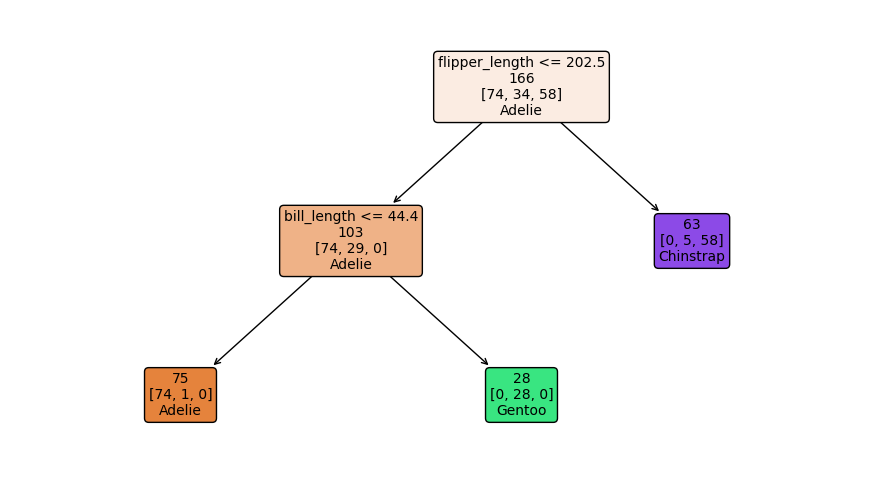

In [1446]:
plt.figure(figsize=(11,6)) #diatur ukuran figur

tree.plot_tree(p_tree, fontsize=10, feature_names=feature_names,
                      class_names=['Adelie','Gentoo', 'Chinstrap'],
                      label= 'none', filled=True, impurity= False,
               rounded= True) #dibuat plot tree

In [1447]:
fi = p_tree.feature_importances_ #membuat importance pada fitur p_tree
for fi_val, f_name in zip (fi, feature_names): #dilakukan looping untuk mengetahui importance fitur
  print(" %4.2f %s " % (fi_val, f_name)) #ditampilkan importance fitur

 0.37 bill_length 
 0.00 bill_depth 
 0.63 flipper_length 
 0.00 body_mass 


## P4 : Permutation Feature Importance and Wrapper

### Permutation Feature Importance


In [1448]:
import pandas as pd #untuk memanipulasi data
import numpy as np #untuk komputasional numerik
from sklearn.inspection import permutation_importance #untuk mengetahui importance permutasi
from sklearn import preprocessing #untuk melakukan prepocessing
from sklearn.metrics import accuracy_score #untuk menghitung skor akurasi
from sklearn.model_selection import cross_val_score  #untuk menghitung skor CV
from sklearn.neighbors import KNeighborsClassifier #untuk melakukan klasifikasi kNN
from sklearn.model_selection import train_test_split # untuk melakukan split data
import matplotlib.pyplot as plt #untuk memvsiualisasikan model/plot

In [1449]:
#Import dataset
col_heads = [str(x) for x in range(34)] #col_heads adalah str suatu x ubtuk x dakam range (34)
col_heads.append('Class') #ditambahkan fitur class pada col_heads
ion_data = pd.read_csv('ionosphere.csv', names= col_heads, na_values='?', header= None) #import file datset
ion_data.dropna(axis= 0, inplace= True) #dilakukan drop pada data yang memiliki nilai Nan
print(ion_data.shape) #ditampilikan dimensi data
ion_data.head() #ditampilkan beberapa baris isi dataset


(351, 35)


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [1450]:
#Split data
y = ion_data.pop('Class').values #dilakukan penghapusan pada fitur class
X = ion_data #merupakan data ion

ion_scaler = preprocessing.MinMaxScaler().fit(X) #dilakukan preprocessing penskalaan fitur pada x
X_scaled = ion_scaler.transform(X) #dilakukan transform pada ion_scaler dengan X
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, random_state=2, test_size=1/2) #dilakukan split data


In [1451]:
#Final results dataframe
res_df = pd.DataFrame([['All Features',0.0,0.0],['After Pi',0.0,0.0]
                       ,['After Wrapper',0.0,0.0]], columns=['Method','X-Val','Hold-Out']) #dibuat dataframe hasil
res_df.set_index('Method', inplace= True) #diatur index dataframe

In [1452]:
#Akurasi
kNN = KNeighborsClassifier(n_neighbors=3) #dilakukan klasifikasi kNN dengan n neighbors=3
kNN= kNN.fit(X_train, y_train) #dilakukan training model kNN dengan data train
y_pred= kNN.predict(X_test) #dilakukan prediksi kNN dengan X_test
acc = accuracy_score(y_pred, y_test) #dihitung skor akurasi dengan argumen y_pred dan y_test
cv_acc= cross_val_score(kNN, X_train, y_train, cv=8) #dihitung skor CV dengan argumen kNN, X_train, y_train, cv=8

res_df.loc['All Features']['X-Val']= cv_acc.mean() # pada fitur All Features & X-Val merupakan nilai mean cv_acc
res_df.loc['All Features']['Hold Out']= acc #pada fitur All Features & Hold Out merupakan nilai acc

print("X_Val on training all features: {0:.3f}".format(cv_acc.mean())) #menampilkan nilai X validation ditrain disemua fitur
print("Hold Out testing all features: {0:.3f}".format(acc)) #menampilkan holdout ditesting pada semua fitur

X_Val on training all features: 0.818
Hold Out testing all features: 0.795


### Permutation feature importance stage

In [1453]:
knn_perm= permutation_importance(kNN, X_train, y_train, n_repeats=10, random_state=0) #menampilkan Permuation Importance dengan banyak repeats=10

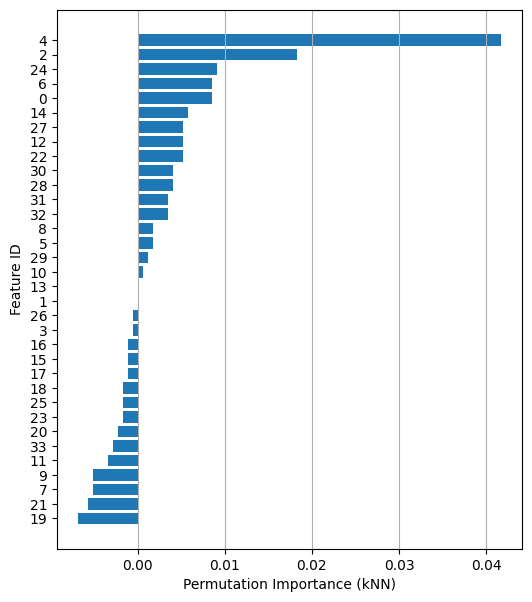

In [1454]:
sorted_idx= knn_perm.importances_mean.argsort() #dihitung nilai mean importance kNN_perm dengan diurutkan
fig, ax = plt.subplots(figsize=(6,7)) #diatur figur dan axis
ax.barh(ion_data.columns[sorted_idx], knn_perm.importances_mean[sorted_idx], zorder=1) #mengatur bar horizontal
ax.xaxis.grid(True) #memberikan grid pda axis x
ax.set_ylabel('Feature ID') #mengatur label y
ax.set_xlabel('Permutation Importance (kNN)') #mengatur label x
ax.figure.savefig('Piscores.png') #menyimpan figur

In [1455]:
mask= knn_perm.importances_mean[sorted_idx]>0 #membuat mask untuk memilih fitur importance lebih dari satu

In [1456]:
PI_features= ion_data.columns[sorted_idx][mask] #membuat PI fitur berdasarkan fitur sorted_idx & mask

In [1457]:
X_PI= X[PI_features] #membuat X pi
print("Permutation Importance selects", X_PI.shape[1], "features.") #ditampilkan nilai importance permutasi dipilih
X_PI_scaled = preprocessing.MinMaxScaler().fit_transform(X_PI) #dilakukan prepocessing penskalaan fitur pada X_PI
X_PI_train, X_PI_test, y_PI_train, y_PI_test= train_test_split(X_PI_scaled, y
                                                               , random_state=2,
                                                               test_size=1/2) #dilakukan split data

Permutation Importance selects 18 features.


In [1458]:
#Hitung kembali Akurasi

knnPI= KNeighborsClassifier(n_neighbors=3) #dilakukan klasifikasi kNN dengan n neigbors yaitu 3
knnPI= knnPI.fit(X_PI_train, y_PI_train) #dilakukan training model dengan data PI_train

y_pred_PI = knnPI.predict(X_PI_test) #dilakukan prediksi dengan X_Pi_test
acc_PI = accuracy_score(y_pred_PI, y_test) #dihitung skor akurasi dengan y_pred_Pi & y_test
cv_acc_PI = cross_val_score(knnPI, X_PI_train, y_train, cv=8) #dihtiung skor CV

res_df.loc['After Pi']['X-Val']= cv_acc_PI.mean() #hsil dataframe fitur After Pi & X-Val adalah mean dari cv_acc_PI
res_df.loc['After Pi']['Hold-Out']= acc_PI  #hsil dataframe fitur After Pi & Hold Out  adalah acc_PI

print('x_val on training PI features: {0:.3f}'.format(cv_acc_PI.mean())) #menampilkan x validation training fitur PI
print('hold out testing PI features: {0:.3f}'.format(acc_PI)) #menampilkan Hold out testing fitur Pi

x_val on training PI features: 0.880
hold out testing PI features: 0.847


### wrapper stage

In [1459]:
from sklearn.feature_selection import SequentialFeatureSelector #untuk seleksi fitur
from sklearn.neighbors import KNeighborsClassifier #untuk melakukan klasifikasi kNN
knn = KNeighborsClassifier(n_neighbors=3) #dilakukan klasifikasi kNN dengan n neighbros =3
sfs= SequentialFeatureSelector(knn, n_features_to_select='auto',direction='backward',
                               cv=10, tol=0.00001) #dilakukan seleksi fitur dengan mengunakan direksi backward dengan cv=10, dan toleransi 0.00001 dan fitur dipilih automatis
sfs.fit(X_PI_train, y_train) #dilakukan train model sfs dengan data train
X_PI_W_train= sfs.transform(X_PI_train) #dilakukan transform sfs dengan X_PI_train
X_PI_W_test= sfs.transform(X_PI_test) #dilakukan transform sfs dengan X_PI_test

In [1460]:
knnPIW= KNeighborsClassifier(n_neighbors=3) #dilakukan klasifikasi kNN dengan n neigbors= 3
knnPIW= knnPIW.fit(X_PI_W_train, y_PI_train) #dilakukan train model dengan data train
print(X_PI_W_train.shape) #menampilkan dimensi data X_PI_W_train
knnPIW.score(X_PI_W_test, y_PI_test) #menampilkan skor knnPIW

(175, 16)


0.8465909090909091

In [1461]:
#hitungakurasi
knnPIW= KNeighborsClassifier(n_neighbors=3) #dilakukan klasifikasi kNN dengan n neigbors= 3
knnPIW= knnPIW.fit(X_PI_W_train, y_PI_train) #dilakukan training model knnPIW dengan megnunakan data train
print(X_PI_W_train.shape) #menampilkan dimensi data X_PI_W_train

y_pred_PIW = knnPIW.predict(X_PI_W_test) #dilakukan prediksi dengan X_PI_W_est
acc_PIW = accuracy_score(y_pred_PIW, y_PI_test) #dihitung skor akurasi dengan
cv_acc_PIW = cross_val_score(knnPIW, X_PI_W_train, y_train, cv=8) #y_pred_PIW, y_PI_test

res_df.loc['After Wrapper']['X-Val']= cv_acc_PIW.mean() #hasil dataframe fitur After Wrapper & X-Val adalah mean dari cv_acc_PIW
res_df.loc['After Wrapper']['Hold-Out']= acc_PIW #hasil dataframe fitur After Wrapper & X-Val adalah mean dari cv_acc_PIW

print('x_val on training PI features: {0:.3f}'.format(cv_acc_PIW.mean())) #menampilkan x validation training fitur PI
print('hold out testing PI features: {0:.3f}'.format(acc_PIW)) #menampilkan holdout testing fitur PI

(175, 16)
x_val on training PI features: 0.897
hold out testing PI features: 0.847


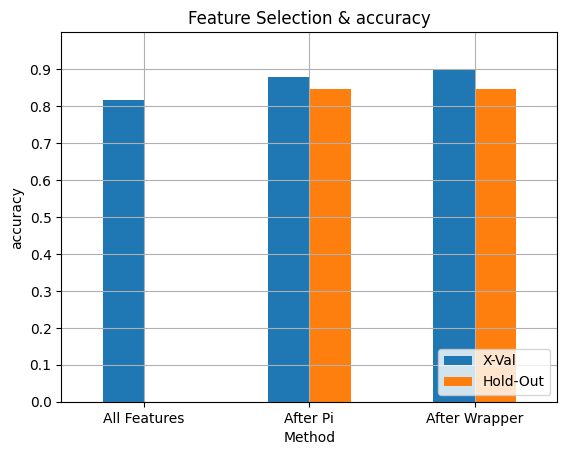

In [1462]:
#plot
ax= res_df.plot.bar(rot=0) #diatur bar plot
ax.set_ylabel("accuracy") #diatur y label
ax.set_title("Feature Selection & accuracy") #diatur judul plot
ax.set_ylim(0,1) #diatur batas sumbu y
ax.set_yticks(np.arange(0,1,0.1)) #diatur titik y dengan range 0, 1, 0.1
ax.legend(loc='lower right') #diatur posisi legend di kanan bwah
ax.grid(True) #diatur grid axis
ax.figure.savefig("PI+wrapper.png") #disimpan figur

# **Soal B: Hasil dan Analisis yang ada pada praktikum 1**

Rangkum hasil,
analisis, dan berikan kesimpulan !

Hasil dan analisis pca:

Pca dan Lda merupakan bagian dalam Feature transform atau bisa disebut dengan transformasi fitur. Feature transform akan melakukan transform dimensi suatu data menjadi lebih kecil agar mempermudah dalam melakukan data mining. Bisa dikatakan sebagai representasi original fitur.


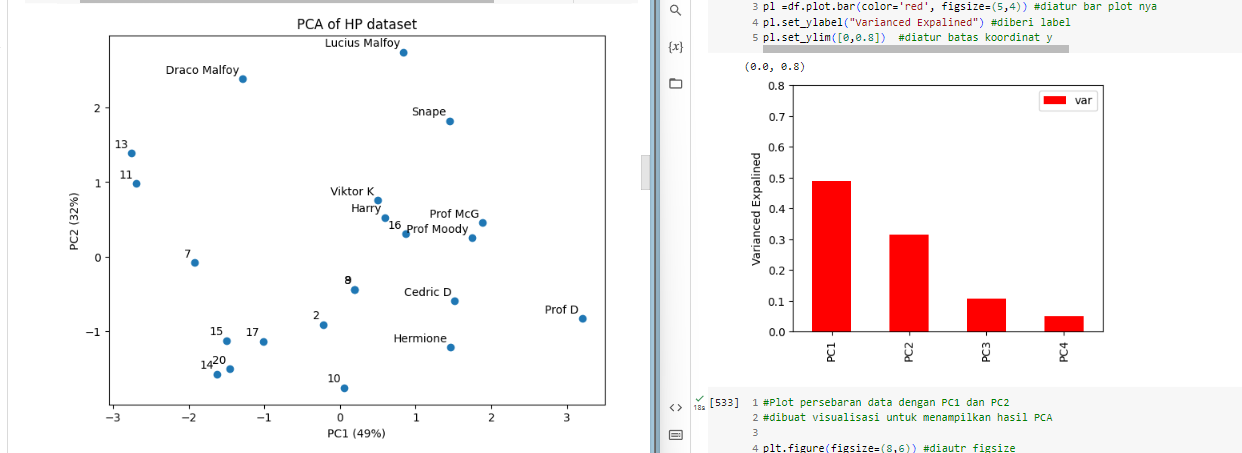

Dari plot diatas bisa kita lihat persebaran data saat dilakukan Pca, bahwa persebaran tersebar rata disemua ttiik  PC1 maupun PC2. Hal inilah menunjukkan, dilakukan pengecilan dimensi, agar data dimiliki terdistribusi banyak dan jauh, dengan melakuan pca kita bisa memperoleh fitur data yang sediikit namun sangat efisien dan memperingkas melakukan komputasi dalam data mining.

Di plot sebelah kanan, bisa kita lihat rasio variansi, saat PC1,PC2,PC3,PC4 berurutan dengan variansi sekitar 0.5, 0.3, 0.1, < 0.1. Sehingga dari plot itu , variansi datanya akan makin mengecil ketika dilakukan Pca

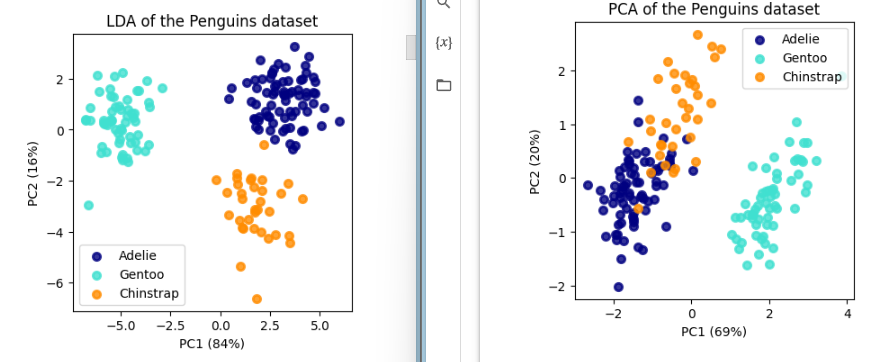

Dari hasil scatterplot pca dan lda bisa kita ketahui:

Pada Lda, class akan terdistribusi dengan class yang sama aja, dimana satu kelas dengan kelas nya akan terpisah, bisa kita lihat pada class adelie hanya berbaur dengan class adelie aja, begitu pula dengan gentoo dan chinstrap.

Namun, pada pca, class akan terdistrbusi  merata dengan class lainnya, bisa kita lihat class adelie terdistribusi dan berbaur dengan class chinstrap.

Sehingga bisa kita simpulkan bahwa Pca akan melakukan transformasi fitur dengan mengurangi dimensi data tanpa memperdulikan label class dengan dilakukan prinsip analisis komponen , namun pada lda mentransformasi dimensi data menjadi lebih rendah dengan memperhatikan pemisahan label class yang baik yang dilakukan dengan analisis diskriminan linear. Dimana walaupun kedua metode ini memiliki perbedaan, namun sangat cocok dan akurat dalam melakukan feature transform

Perbedaa Pca & lda

| no | PCA | LDA |
|--------|------|----------|
| 1. | melakukan transformasi fitur dengan analisis komponen | melakukan transformasi fitur dengan analisis diskriminan linear |
| 2. | Tidak memperhatikan label class | memperhatikan label class |
| 3. | Pca cocok untuk mengubah dimensi data | Lda cocok dalam pemisahan class fitur klasifikasi   |


# **Soal C: Model Filters dan Correlation Based Feature Selection (CFS) Dengan dataset penguins.csv**

Rangkum hasil,
analisis, dan berikan kesimpulan !

## Feature Selection using Filters

In [1463]:
#Import Packages
import pandas as pd #digunakan dalam memanipulasi data
import numpy as np #difgunakan dalam komputasi numerik
from sklearn.feature_selection import chi2, mutual_info_classif #digunakan untuk menghitung chi, informasi mutual classif
from sklearn.model_selection import train_test_split #untuk melakukan split data
from sklearn.preprocessing import MinMaxScaler #untuk penskalaran fitur
from sklearn.model_selection import cross_val_score #untuk menhitung cross validation dengan berbagai metrik
import matplotlib.pyplot as plt #untuk membuat plot model


In [1464]:
#Import dataset
seg_data = pd.read_csv('penguins.csv') #import dataset format csv dengan pandas
print(seg_data.shape) #ditampilkan dimensi data (baris,kolom(fitur))
seg_data.head() #menampilkan beberapa data

(333, 6)


,Unnamed: 0,bill_length,bill_depth,flipper_length,body_mass,species
0,0,39.1,18.7,181.0,3750.0,Adelie
1,1,39.5,17.4,186.0,3800.0,Adelie
2,2,40.3,18.0,195.0,3250.0,Adelie
3,3,36.7,19.3,193.0,3450.0,Adelie
4,4,39.3,20.6,190.0,3650.0,Adelie


In [1465]:
seg_data['species'].value_counts() #Mengitung data pada variabel target(species)

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [1466]:
# Split data
y= seg_data.pop('species').values #y merupakan menghapus fitur species pada dataset dan diekstrak nilainya menjadi numerik
X_raw = seg_data.values #X_raw adalah nilai seg_data

X_tr_raw, X_ts_raw, y_train,y_test = train_test_split(X_raw, y, random_state=1, test_size=1/2) #dilakukan split data dengan random state-1 dan ukuran test 1/2
scaler= MinMaxScaler() #dilakukan penskalaan fitur
X_train= scaler.fit_transform(X_tr_raw)  #dilakukan pembuatan nilai x train untuk model
X_test= scaler.transform(X_ts_raw) #dilakukan pembuatan nilai x test untuk model

feature_names= seg_data.columns #memanggil fitur pada seg_data
X_train.shape, X_test.shape #ditampilkan dimensi pada setiap fitur train dan test

((166, 5), (167, 5))

In [1467]:
#Feature Scores
chi2_score, pval= chi2(X_train, y_train) #dilakukan perhitungan chi
chi2_score = np.nan_to_num(chi2_score) #menggantu nilai nan ke nol pada chi2_score
chi2_score #menampilkan skor chi

array([23.27831336, 12.33320189, 13.04056372, 15.91528968, 13.39467176])

In [1468]:
i_scores =mutual_info_classif(X_train, y_train) #menghitung skor info pada setiap fitur
i_scores #menampilkan i_scores

array([1.03689788, 0.62374376, 0.53157877, 0.62181205, 0.5467691 ])

In [1469]:
# Simpan skor
df= pd.DataFrame({'Mutual info.': i_scores,'Chi Square':chi2_score,'Feature':feature_names}) #lalu nilai yang diperoleh disimpan dalam sebuh dataframe
df.set_index('Feature', inplace = True) #diatur index berdasarkan fitur
df.sort_values('Mutual info.', inplace=True, ascending=False) #dataframe diurutkan berdasarkan mutual info
df #menampilkan df

,Mutual info.,Chi Square
Feature,,
Unnamed: 0,1.036898,23.278313
bill_length,0.623744,12.333202
flipper_length,0.621812,15.915290
body_mass,0.546769,13.394672
bill_depth,0.531579,13.040564


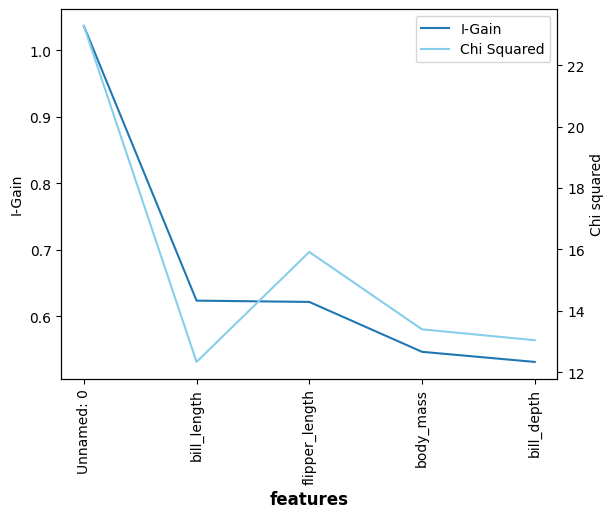

In [1470]:
#plot filter score
fig, ax= plt.subplots() #mengatur subplots
rr= range(0,len(feature_names)) #menentukan rr merupakan range 0 hingg panjang fitur
ax2= ax.twinx() #membuat axis2
ax.plot(df.index, df['Mutual info.'], label='I-Gain') #membuat plot ax
ax2.plot(df.index, df['Chi Square'], label='Chi Squared', color='skyblue') #membuat plot ax2
ax.set_xticks(rr) #menunjukkax tanda sumbu pada rr

ax.set_xticklabels(list(df.index), rotation=90) #mengatur label pada sumbu x
ax.set_xlabel('features', fontsize=12, fontweight='bold') #mengaturlabel pada sumbu x dengan ukuran font,
ax.set_ylabel('I-Gain') #mengaturlabel pada sumbu y
ax2.set_ylabel('Chi squared') #mengaturlabel pada sumbu y
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax.transAxes) #menambahkan legend

In [1471]:
#Hitung korelasi
from scipy import stats #memanggil stats dri library scipy
stats.spearmanr(chi2_score, i_scores) #menampilkan statistik spearman

SignificanceResult(statistic=0.39999999999999997, pvalue=0.5046315754686911)

Correlation Based Feature Selection (CFS)

In [1472]:
# Import Packages
import pandas as pd #untuk memanipulasi data
import numpy as np #untuk komputasional numerik
from sklearn.model_selection import train_test_split #untuk melbkukan split data
from sklearn.preprocessing import MinMaxScaler #untuk penskalaran fitur
from sklearn.neighbors import KNeighborsClassifier #untuk melakukan proses KNN pada problem klasifikasi
from sklearn.metrics import accuracy_score #untuk mengetahui skor akurasi
from sklearn.model_selection import cross_val_score #untuk mengetahui skor cross validation
import matplotlib.pyplot as plt #untuk membuat visualisasi plot pada model
from matplotlib.ticker import MaxNLocator #untuk mengatur titik sumbu pada plot


In [1473]:
from CFS import cfs, merit_calculation #untuk membuvt CFS dan menghitung korelasi fitur
from CFS_ForwardSearch import CFS_FS #untuk membuat CFS FS

In [1474]:
seg_data = pd.read_csv('penguins.csv') #import dataset yang digunakan
print(seg_data.shape)#menampilkvn dimensi data
seg_data.head() #menampilkan beberapa data

(333, 6)


,Unnamed: 0,bill_length,bill_depth,flipper_length,body_mass,species
0,0,39.1,18.7,181.0,3750.0,Adelie
1,1,39.5,17.4,186.0,3800.0,Adelie
2,2,40.3,18.0,195.0,3250.0,Adelie
3,3,36.7,19.3,193.0,3450.0,Adelie
4,4,39.3,20.6,190.0,3650.0,Adelie


In [1475]:
y = seg_data.pop('species').values  #y merupakan menghapus fitur species pada dataset dan diekstrak nilainya menjadi numerik
X_raw = seg_data.values #x_raw adalah merupakan nilai seg_data
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                       random_state=2, test_size=1/2) #dilakukan split data
scaler = MinMaxScaler() #dilakukan penskalaan fitur
X_train = scaler.fit_transform(X_tr_raw) #membuat data x train(latih)
X_test = scaler.transform(X_ts_raw) #memmbuat data x test(uji)
max_length = X_train.shape[0] #mengukur panjang maksimum dengan cek ukurvn pada X_train dri 0
feat_num = X_train.shape[1] #menentukan nilai feat dengan cej ukuran pada X_train
X_train.shape, X_test.shape #menampilkan dimensi data X_train dan X_test

((166, 5), (167, 5))

In [1476]:
kNN = KNeighborsClassifier(n_neighbors=5) #dilakukan KNN dengan banyak neighbors yaitu 5
kNN = kNN.fit(X_train,y_train) #dilakukan KNN pada X_train dan Y_train
y_pred = kNN.predict(X_test) #dcari nilai Y prediksi dengan X_test
acc = accuracy_score(y_pred,y_test) #dihitung skor akurasi dengn y prediksi dan y test
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8) #dihitung skor Cross validation dengan cv diatur = 8

print("X_Val on training all features: {0:.3f}".format(cv_acc.mean())) #menampilka nilai X validation ditraining pada semua fitur
print("Hold Out testing all features: {0:.3f}".format(acc)) #menampilkn nilai Hold-Out ditesting pada semua fitur

X_Val on training all features: 1.000
Hold Out testing all features: 1.000


## Correlation Based Feature Selection (CFS)


In [1477]:
# Import Packages
import pandas as pd #untuk memanipulasi data
import numpy as np #untuk komputasional numerik
from sklearn.model_selection import train_test_split #untuk melbkukan split data
from sklearn.preprocessing import MinMaxScaler #untuk penskalaran fitur
from sklearn.neighbors import KNeighborsClassifier #untuk melakukan proses KNN pada problem klasifikasi
from sklearn.metrics import accuracy_score #untuk mengetahui skor akurasi
from sklearn.model_selection import cross_val_score #untuk mengetahui skor cross validation
import matplotlib.pyplot as plt #untuk membuat visualisasi plot pada model
from matplotlib.ticker import MaxNLocator #untuk mengatur titik sumbu pada plot


In [1478]:
from CFS import cfs, merit_calculation #untuk membuvt CFS dan menghitung korelasi fitur
from CFS_ForwardSearch import CFS_FS #untuk membuat CFS FS

In [1479]:
seg_data = pd.read_csv('penguins.csv') #import dataset yang digunakan
print(seg_data.shape)#menampilkvn dimensi data
seg_data.head() #menampilkan beberapa data

(333, 6)


,Unnamed: 0,bill_length,bill_depth,flipper_length,body_mass,species
0,0,39.1,18.7,181.0,3750.0,Adelie
1,1,39.5,17.4,186.0,3800.0,Adelie
2,2,40.3,18.0,195.0,3250.0,Adelie
3,3,36.7,19.3,193.0,3450.0,Adelie
4,4,39.3,20.6,190.0,3650.0,Adelie


In [1480]:
y = seg_data.pop('species').values  #y merupakan menghapus fitur species pada dataset dan diekstrak nilainya menjadi numerik
X_raw = seg_data.values #x_raw adalah merupakan nilai seg_data
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                       random_state=2, test_size=1/2) #dilakukan split data
scaler = MinMaxScaler() #dilakukan penskalaan fitur
X_train = scaler.fit_transform(X_tr_raw) #membuat data x train(latih)
X_test = scaler.transform(X_ts_raw) #memmbuat data x test(uji)
max_length = X_train.shape[0] #mengukur panjang maksimum dengan cek ukurvn pada X_train dri 0
feat_num = X_train.shape[1] #menentukan nilai feat dengan cej ukuran pada X_train


In [1481]:
kNN = KNeighborsClassifier(n_neighbors=5) #dilakukan KNN dengan banyak neighbors yaitu 5
kNN = kNN.fit(X_train,y_train) #dilakukan KNN pada X_train dan Y_train
y_pred = kNN.predict(X_test) #dcari nilai Y prediksi dengan X_test
acc = accuracy_score(y_pred,y_test) #dihitung skor akurasi dengn y prediksi dan y test
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8) #dihitung skor Cross validation dengan cv diatur = 8

print("X_Val on training all features: {0:.3f}".format(cv_acc.mean())) #menampilka nilai X validation ditraining pada semua fitur
print("Hold Out testing all features: {0:.3f}".format(acc)) #menampilkn nilai Hold-Out ditesting pada semua

X_Val on training all features: 1.000
Hold Out testing all features: 1.000


Forward Search - CFS

In [1482]:
merit_score_sel, sel_comb = CFS_FS(X_train, y_train) #dilakukan CFS_FS deng mengunakan data training sebagai variabel merit_score_sel, sel_com

In [1483]:
# Print the selected features
feature_names_sel = seg_data.columns[np.array(sel_comb)]

In [1484]:
X_train_CFS_FS = X_train[:,sel_comb] #dibuat data x train CFS FS
X_test_CFS_FS = X_test[:,sel_comb] #dibuat data X test CFS FS

kNN_CFS_FS = kNN.fit(X_train_CFS_FS,y_train) #lalu ditrain model dengan fungsi kNN.fit dengan argumen X_train_CFS_FS & y_train

y_pred = kNN_CFS_FS.predict(X_test_CFS_FS) #lalu dilakukan prediksi pada model dengan kNN_CFS_FS.predict dengan argumen disimpan pada y_pred
acc_CFS_FS = accuracy_score(y_pred,y_test) #lalu dihitung skor akurasi dengan accuracy_score dengan y_pred & y_test disimpan pada variabel acc_CFS_FS
cv_acc_CFS_FS = cross_val_score(kNN_CFS_FS, X_train_CFS_FS, y_train, cv=8) #lalu dilakukan cross validation yang mengunakan cv= 8 dengan argumen kNN_CFS_FS, X_train_CFS_FS & y_train

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS_FS.mean())) #lalu ditampilkan nilai X validation ditraining fitur seleksi
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS_FS)) #laly ditampilkan holdout ditesting fitur seleksi

X_Val on training selected features: 0.988
Hold Out testing selected features: 1.000


Best First Search - CFS

In [1485]:
Sel_feat = cfs(X_train,y_train) #variabel Sel_feat dilakukan fungsi cfs dengan argumen X_train & y_train
Sel_feat = Sel_feat[Sel_feat!=-1] #dilakukan pengecekan untuk sel_feat bernilai -1, tidak ditampikan

In [1486]:
# Print the names of the features selected
feature_names_sel = seg_data.columns[Sel_feat] #memanggil kolom seg_data dimana fiturnya adalah sel_feat

In [1487]:
# Find the merit score for the search space of the selected feature subsets
merit = [] #merit diawali merupakan list kosong
cv_acc_CFS = [] #cv_acc_CFS merupakan list kosong
for i in range(1,len(Sel_feat)+1): #dilakukan looping pada pengisian list kosong tadi
    X_train_CFS = X_train[:,Sel_feat[0:i]]  #X_train_CFS
    merit.insert(i, merit_calculation(X_train_CFS, y_train)) #ditambahkan hasil nilai i, kalkulasi meirit sebuah argumen ke list meirt
    kNN_CFS = kNN.fit(X_train_CFS,y_train) #dilakukan training kNN dengan argumen X_train_CFS,y_train
    cv_acc_CFS.insert(i,cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8).mean()) # ditambahkan hasil nilai i, skor cv pada argumen ke list cv_acc_CFSmcv_acc_CFS

merit #menampilkan skor merit

[0.3405367650586217,
 0.34140438602544737,
 0.34135154379629856,
 0.3315979801428004,
 0.3247704646387883]

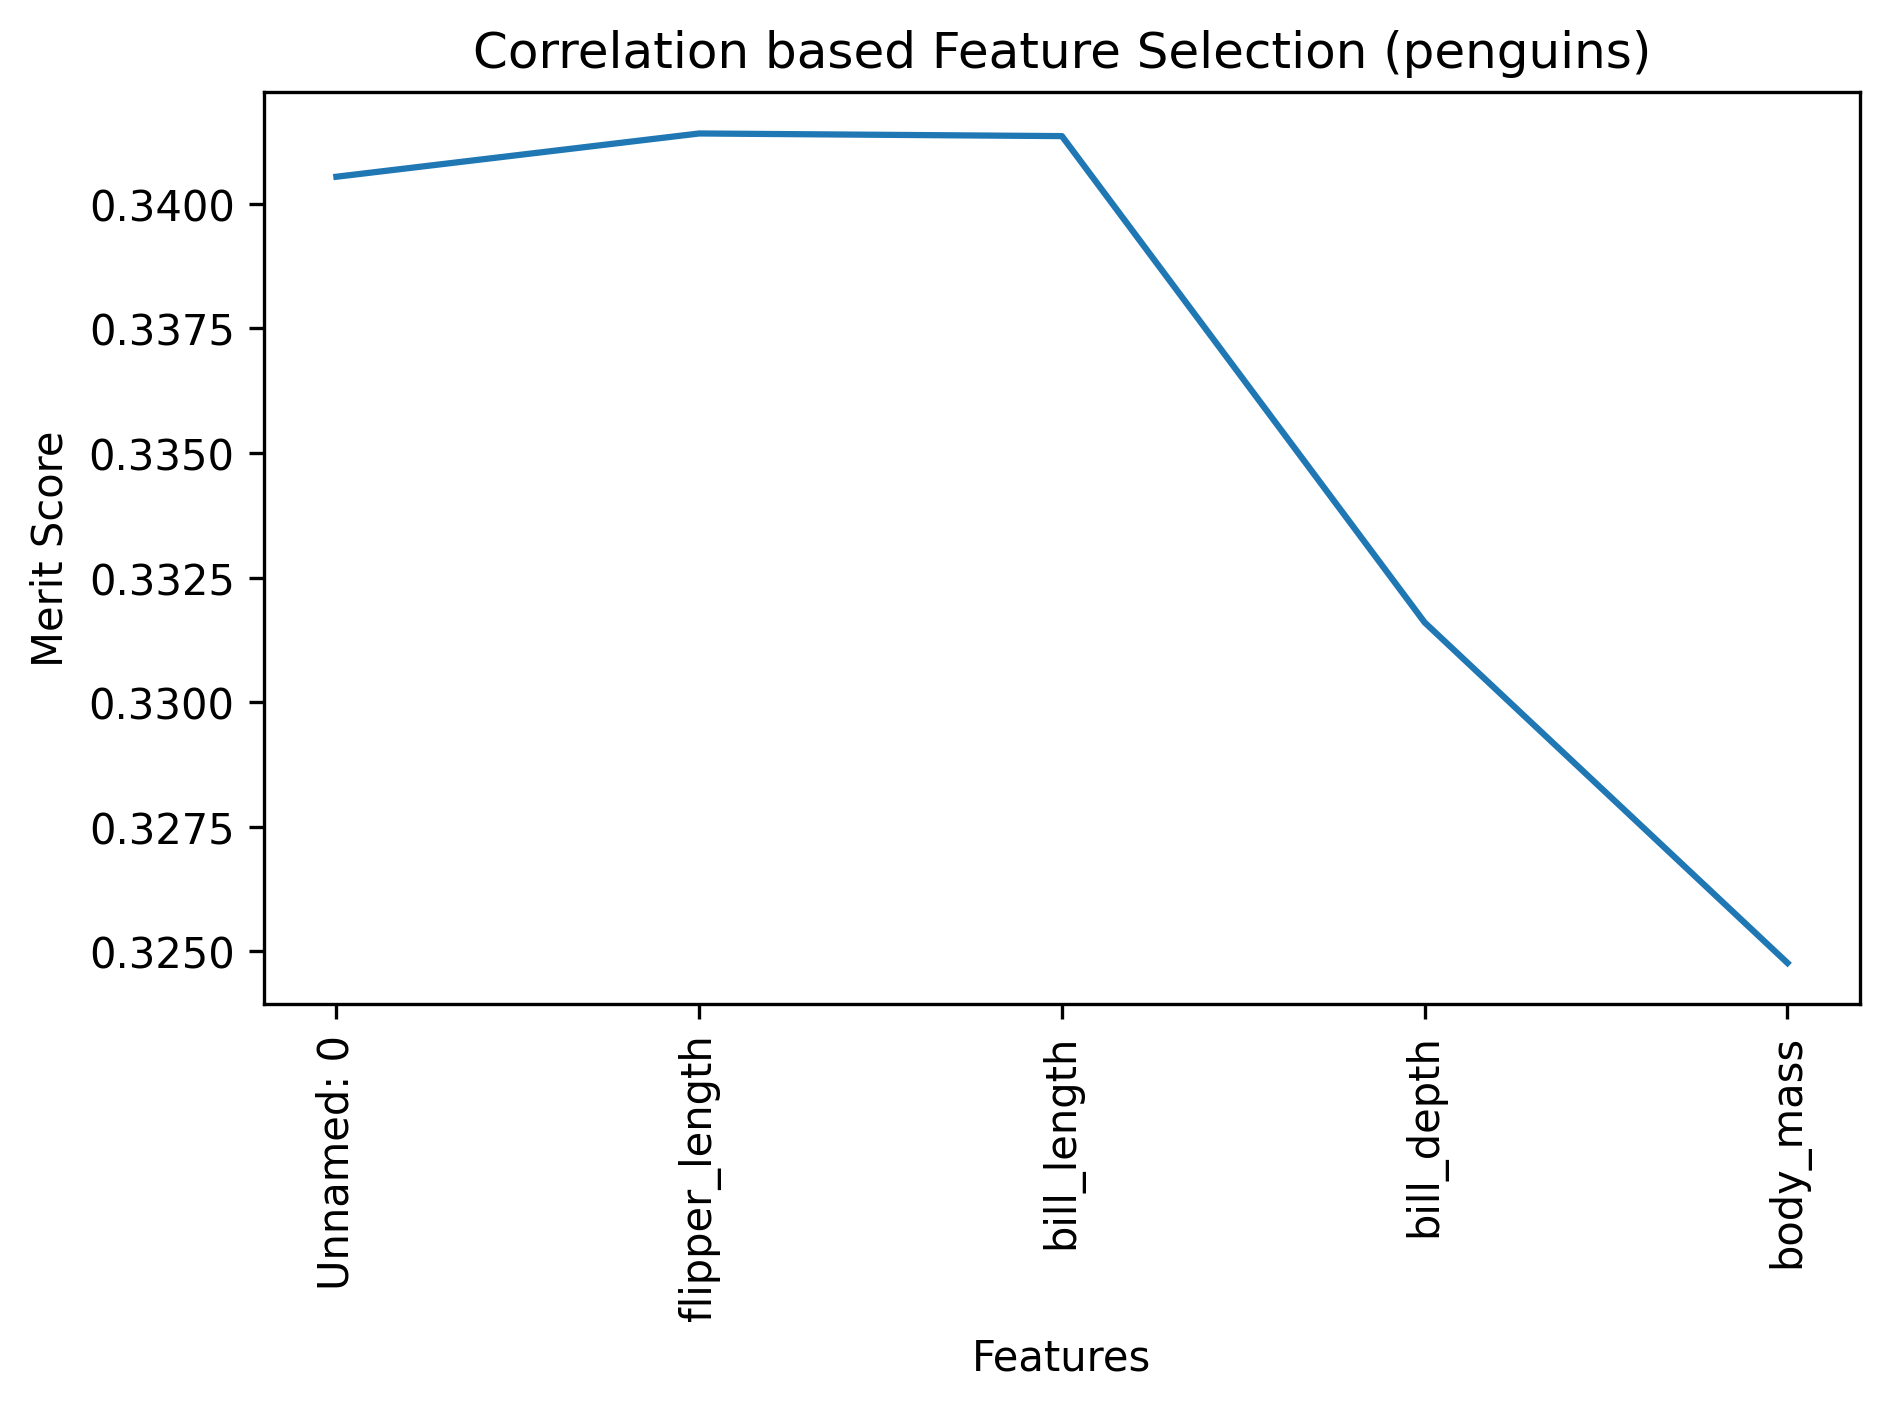

In [1488]:
# Plot merit score as features are added
f1 = plt.figure(dpi = 300) #diatur figur, dengan dpi =300
plt.plot(feature_names_sel, merit) #dipanggil data akan diplotkan yaitu feature_names_sel dan merit
plt.title("Correlation based Feature Selection (penguins)") #menampilkan judul plot
plt.xticks(rotation=90) #mengatur titik x
plt.xlabel("Features") #mengatur label x
plt.ylabel("Merit Score") #Mengatur label y
plt.tight_layout() #menampilkan plot

In [1489]:
#dilakukan evaluasi data
X_test_CFS = X_test[:,Sel_feat] #dibuat X_test_CFS

kNN_CFS = kNN.fit(X_train_CFS,y_train) #dilakukan train kNN pada argumen data train

y_pred = kNN_CFS.predict(X_test_CFS) #dihitung y prediksi dengan mengunakan kNN_CFS.predict dengan argumen X_test_CFS

acc_CFS = accuracy_score(y_pred,y_test) #dihitung skor akurasi pada argumen kedua argumen y dengan gfungsi accuracy_score
cv_acc_CFS = cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8) #dihitung skor CV dengan fungsi cross_val_score dengan argumen kNN_CFS, X_train_CFS, y_train & diatur cv=8

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS.mean())) #ditampilkan nilai X Validation trainig
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS)) #ditampilkan nilai hold out testing

X_Val on training selected features: 1.000
Hold Out testing selected features: 1.000


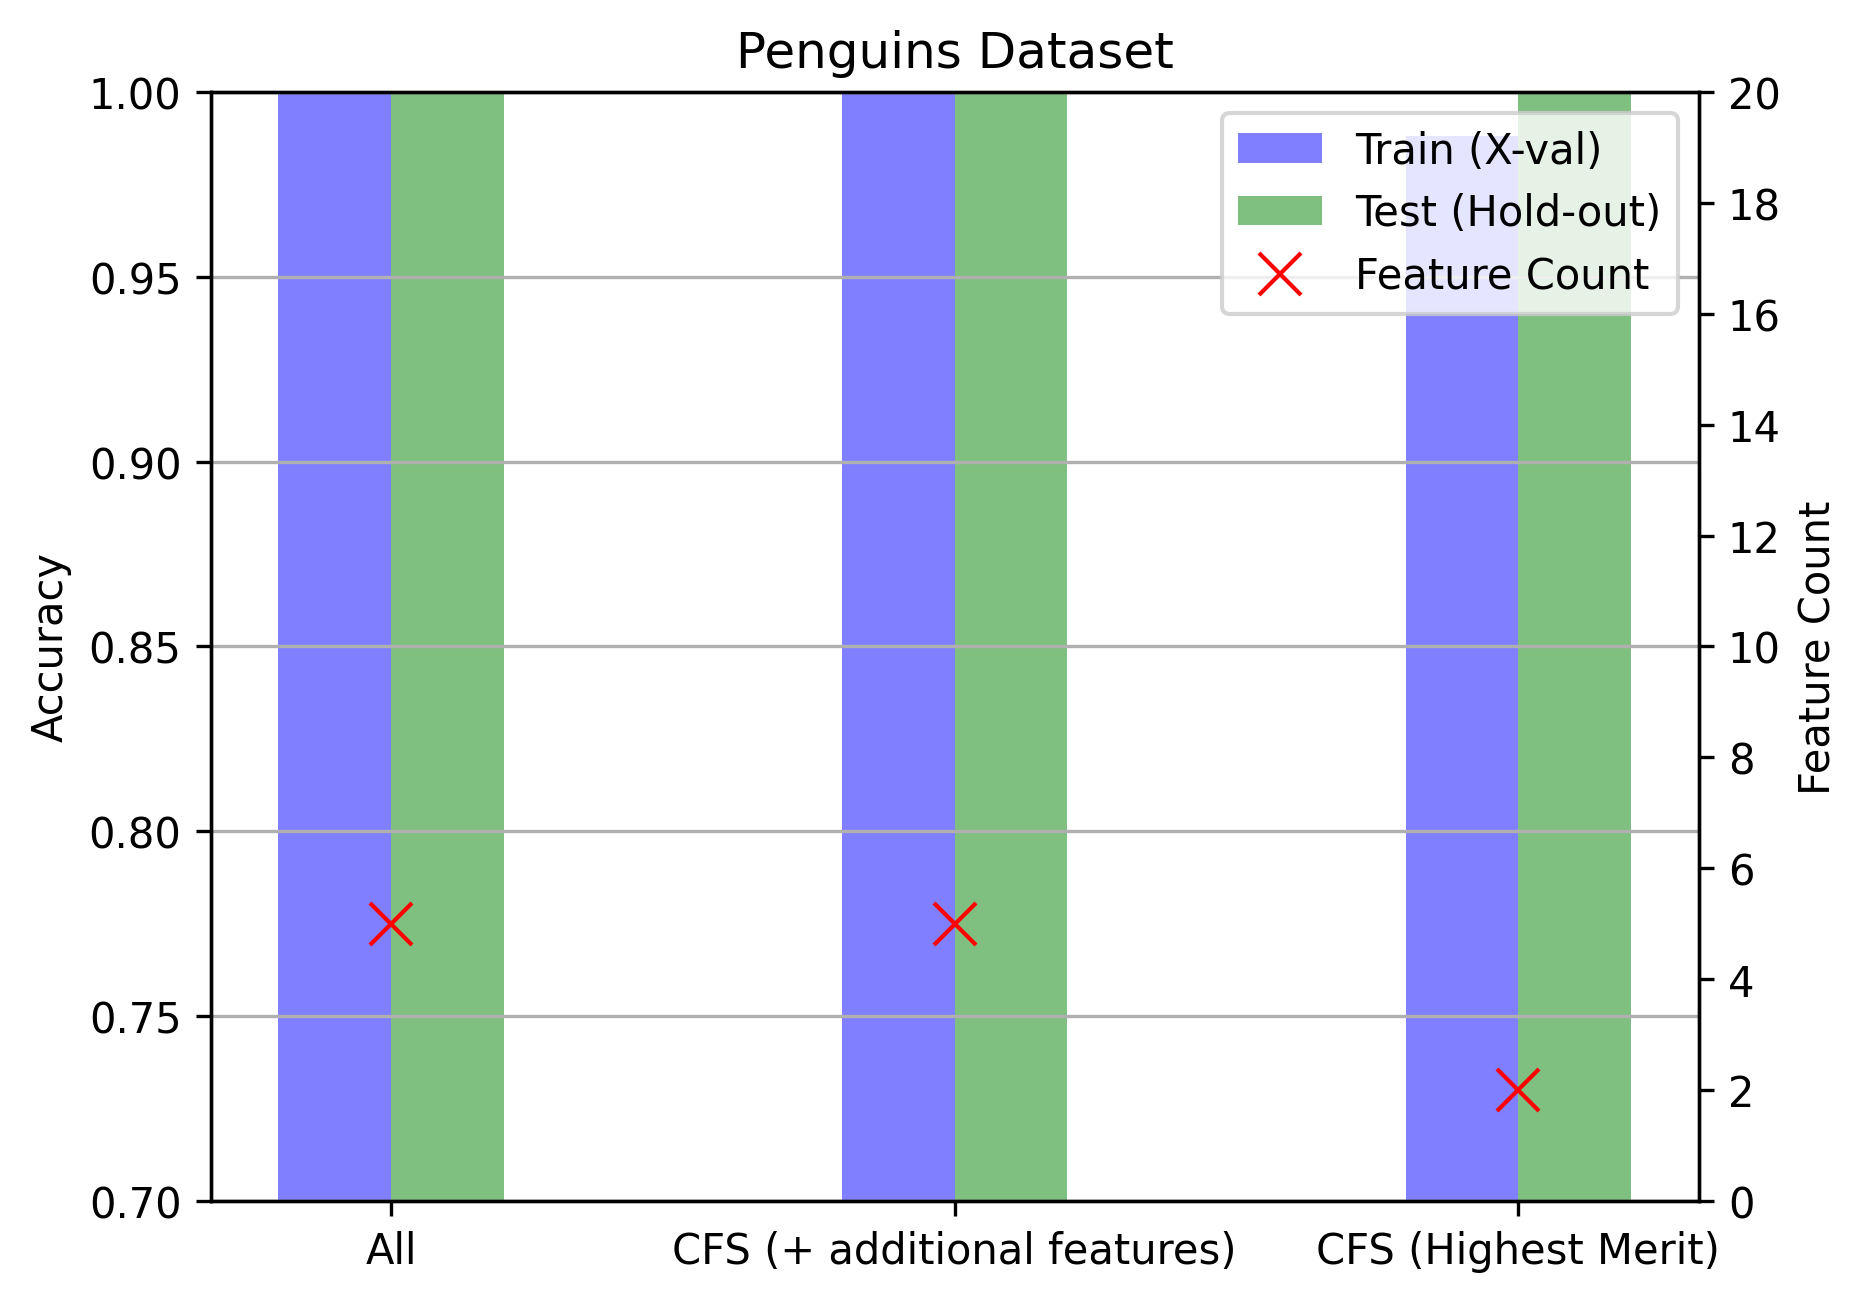

In [1490]:
fig, ax = plt.subplots(dpi = 300) #diatur figur dan axi dengan dpi=300
width = 0.2 #dengan lebar(width)= 0.2

options = ['All', 'CFS (+ additional features)', 'CFS (Highest Merit)'] #dibuat options untuk mengabung semua fitur model
n_feat = [X_train.shape[1], X_train_CFS.shape[1], X_train_CFS_FS.shape[1]] #dibuat n_feat berdasarkan data train dari  x-trai
accs = [acc,acc_CFS, acc_CFS_FS] #dibuat variabel menampilkan akurasi
xv = [cv_acc.mean(), cv_acc_CFS.mean(), cv_acc_CFS_FS.mean()] #dibuat variabek menampilkan cv

y_pos = np.arange(len(options))

p1 = ax.bar(y_pos-width/2, xv, width, align='center', label = 'Train (X-val)',
            color=['blue','blue','blue'],alpha=0.5) #mengatur axis bar 1
p2 = ax.bar(y_pos+width/2, accs , width, align='center', label = 'Test (Hold-out)',
            color=['g','g','g'],alpha=0.5) #mengatur axis bar 2

ax.set_ylim([0.7, 1]) #mengatur batas axis y
ax2 = ax.twinx() #merge axis x

p3 = ax2.plot([0,1,2],n_feat, color = 'red', label = 'Feature Count', marker = 'x', ms = 10, linewidth=0) #mengatur axis plot
ax2.set_ylim([0, 20]) #mengatur batas axis y

ax.grid(axis = 'y') #membuat grid pada plot yaitu axis= 'y'

h1, l1 = ax.get_legend_handles_labels() #diatur legend
h2, l2 = ax2.get_legend_handles_labels() #diatur legend
ax2.legend(h1+h2, l1+l2, loc = 'upper right') #diposisikan legend di atas kanan

ax2.yaxis.set_major_locator(MaxNLocator(integer=True)) #mengatur penempatan mayor pada sumbu y

plt.xticks(y_pos, options) #untuk mengatur titik x
ax.set_ylabel('Accuracy') #memberikan label sumbu y
ax2.set_ylabel('Feature Count') #memberikan label sumbu y lainnya
plt.title("Penguins Dataset") #memberikan judul plot
plt.show() #menampilkan plot

**Hasil dan kesimpulan**

Sehingga dari Model filters dan Correlation bases features:

Pada model filter kita bisa melakukan analisis dari plot filter score, bahwa fitur unnamed: 0 memiliki nilai I-Gain dan CHi-square yang tinggi dengan nilai masing2 >1.0 . Sehingga bisa dikatakan pada fitur tersebut memiliki informasi yang besar dengan kelas yang diprediksi
, namun fitur tersebut hanya merupakan fitur dengan class penomoran saja, sehingga bisa dikatakan fitur flipper_lenght yang lebih tepat dikatakan fitur dengan informasi terbesar dan bisa dikatakan memiliki korelasi besar dengan fitur prediksi

Lalu kita bisa menganalisis bahwa pada line chart CFS, didapatkan merit skor terbesar berada diatas 0.3400 pada fitur flipper_length & bill_length. Sehingga bisa dikatakan pada kedua fitur memiliki korelasi yang tinggi terhadap fitur prediksi

Sehinga dari filter dan cfs, bisa kita simpulkan bahwa fitur flipper length sangat direkomendasikan dalam proses feature selection karena memenuhi kriteria subset fitur yang optimal. Jika dilakukan keputusan pada semua metode filter&CFS dari barplot diatas, bahwa pada semua metode memiliki akurasi tinggi, namun pada CFS(highest merit) cukup memiliki akurasi tidak sampai 1.0 pada X-Validation (train), dan juga rata-rata count feature disemua metode filter berada di range 0.75- 0.80, sedangkan CFS(highest merit) berada dibawah range tersebut. hal inilah menyebabkan fitur di CFS(highest merit) sediit dan juga akan mempengaruhi model yang dibangun seperti hilangnya informasi importance namun bisa menghindari overfitting

# **Soal D: Model Decison Tree dataset Segmentasi**

Rangkum hasil,
analisis, dan berikan kesimpulan !

In [1491]:
#Import Packages
from sklearn.tree import DecisionTreeClassifier #dipanggil package sklearn.tree dengan fungsi DecisionTreeClassifier untuk melakukan klasifikasi Decision Tree
from sklearn import tree #dipanggil sklearn dengan fungsi tree
from sklearn.model_selection import train_test_split #dipanggil package sklearn.model_selection dengan fungsi train_test_split untuk melakukan split data
from sklearn.model_selection import cross_val_score #dipanggil fungsi untuk menghitung skor CV
from sklearn.metrics import accuracy_score #dipanggil fungsi untuk menghitung skor akurasi
import matplotlib.pyplot as plt #library untuk memvisualisasikan model

In [1492]:
#Import dataset
seg_df = pd.read_csv('segmentation-all.csv') #import dataset berformat csv dengan pandas
feature_names = seg_df.columns#kolom pada penguins_df dinamakan feature_names
print(seg_df.shape) #menampilkan dimensi dataset
seg_df.head() #menampilkan beberapa baris dari dataset


(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140,125,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188,133,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105,139,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34,137,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39,111,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [1493]:
seg_df['Class'].value_counts() #menampilkan nilai class

BRICKFACE    330
SKY          330
FOLIAGE      330
CEMENT       330
WINDOW       330
PATH         330
GRASS        330
Name: Class, dtype: int64

In [1494]:
y =seg_df.pop('Class').values #y merupakan data yang dihapus fitur spesies dari seg_df
X= seg_df.values #x adalah nilai data pada penguins_df

X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=1, test_size=1/2) #dilakukan split data
feature_names = seg_df.columns #kolom pada seg_df merupakan feature_names
X_train.shape, X_test.shape #menampilkan ukuran pada data x (train&test)

((1155, 19), (1155, 19))

In [1495]:
ftree= DecisionTreeClassifier(criterion='entropy') #dilakukan klasifikasi pada decision tree dengan kriteria yaitu entropy
ftree= ftree.fit(X_train, y_train) #dilakukan training model ftree pada data train
y_pred=ftree.predict(X_test) #dibuat prediksi ftree dengan mengunakan X_test
acc= accuracy_score(y_pred, y_test) #mengukur skor akurasi pada y_pred dan y_tes
print("Test set accuract %4.2f" % (acc)) #menampilkan hasil akurasi test set

Test set accuract 0.96


[Text(0.7695652173913043, 0.9583333333333334, 'REGION-CENTROID-ROW <= 155.5\n1155\n[147, 160, 160, 175, 173, 175, 165]\nCEMENT'),
 Text(0.6086956521739131, 0.875, 'RAWRED-MEAN <= 25.167\n804\n[147, 153, 160, 4, 0, 175, 165]\nPATH'),
 Text(0.391304347826087, 0.7916666666666666, 'HUE-MEAN <= -1.838\n485\n[147, 21, 150, 4, 0, 0, 163]\nGRASS'),
 Text(0.1391304347826087, 0.7083333333333334, 'HUE-MEAN <= -2.224\n308\n[3, 20, 144, 0, 0, 0, 141]\nFOLIAGE'),
 Text(0.05217391304347826, 0.625, 'SATURATION-MEAN <= 0.478\n82\n[0, 1, 79, 0, 0, 0, 2]\nFOLIAGE'),
 Text(0.034782608695652174, 0.5416666666666666, 'VEDGE-MEAN <= 3.917\n3\n[0, 1, 0, 0, 0, 0, 2]\nGRASS'),
 Text(0.017391304347826087, 0.4583333333333333, '2\n[0, 0, 0, 0, 0, 0, 2]\nGRASS'),
 Text(0.05217391304347826, 0.4583333333333333, '1\n[0, 1, 0, 0, 0, 0, 0]\nSKY'),
 Text(0.06956521739130435, 0.5416666666666666, '79\n[0, 0, 79, 0, 0, 0, 0]\nFOLIAGE'),
 Text(0.22608695652173913, 0.625, 'RAWRED-MEAN <= 2.611\n226\n[3, 19, 65, 0, 0, 0, 139]\n

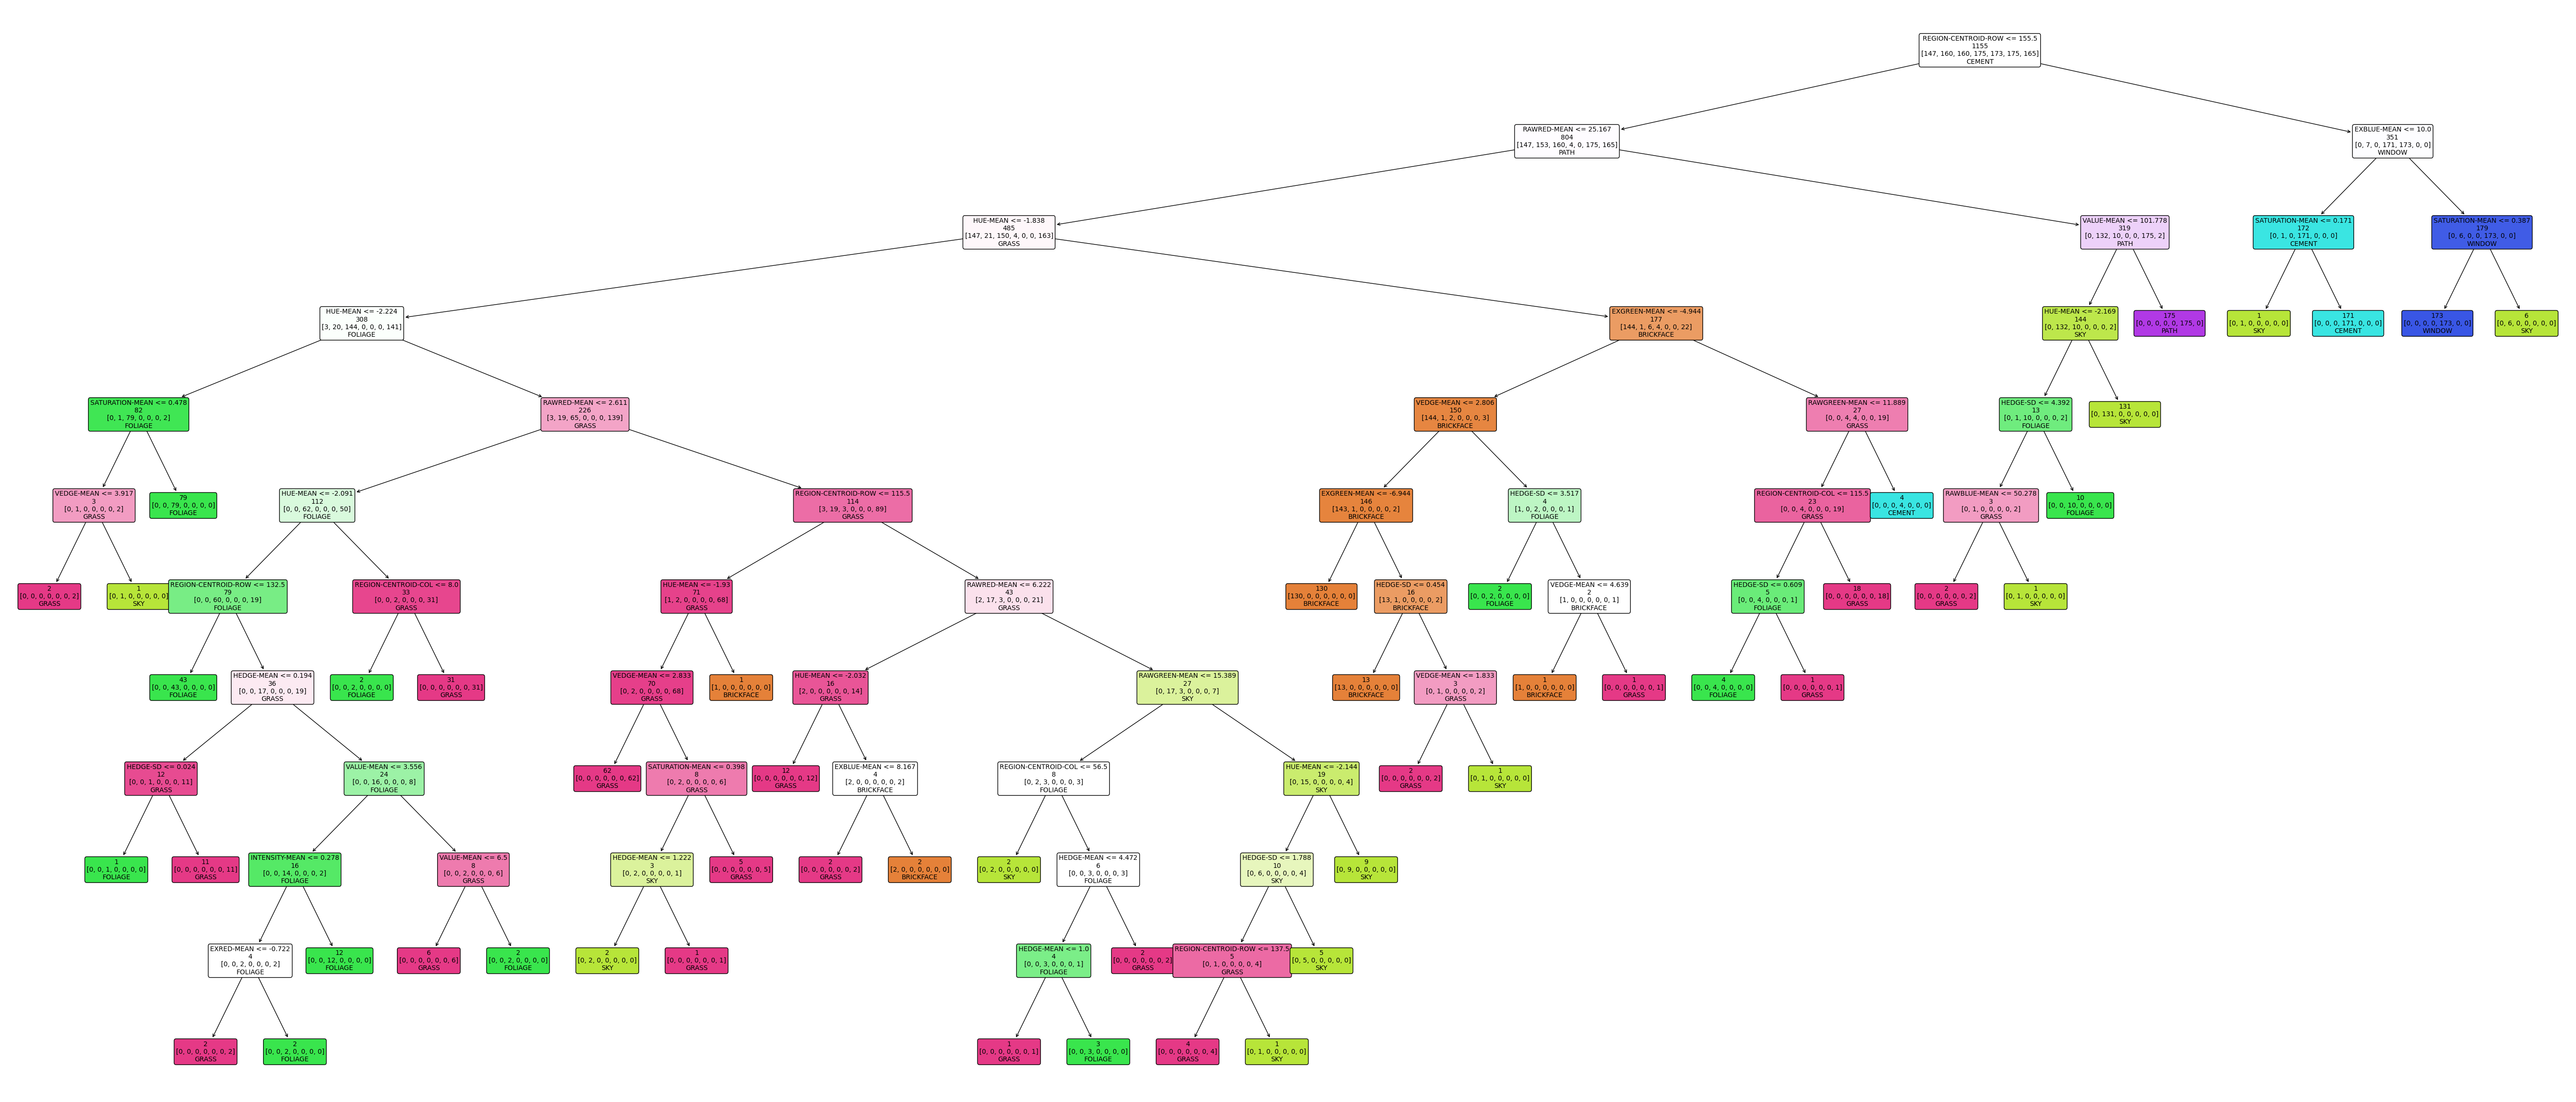

In [1496]:
plt.figure(figsize=(70,30)) #mengatur figur plot

tree.plot_tree(ftree, fontsize=10, feature_names=feature_names,
                      class_names=['BRICKFACE','SKY', 'FOLIAGE',
                                   'CEMENT','WINDOW','PATH','GRASS'],
                      label= 'none', filled=True, impurity= False,
               rounded= True) #membuat plot tree dengan mengatur fontsize, feature_names, label, impurity, filled, rounded

In [1497]:
fi = ftree.feature_importances_ #menampilkan importance fitur pada ftree

for fi_val, f_name in zip(fi,feature_names): #dilakukan loop pada fi validation dan f name dalam zip dengan argumen fi, feature_names
  print('%4.2f %s' % (fi_val,f_name)) #menampikan importance fitur

0.01 REGION-CENTROID-COL
0.31 REGION-CENTROID-ROW
0.00 REGION-PIXEL-COUNT
0.00 SHORT-LINE-DENSITY-5
0.00 SHORT-LINE-DENSITY-2
0.01 VEDGE-MEAN
0.00 VEDGE-SD
0.01 HEDGE-MEAN
0.01 HEDGE-SD
0.00 INTENSITY-MEAN
0.22 RAWRED-MEAN
0.00 RAWBLUE-MEAN
0.01 RAWGREEN-MEAN
0.00 EXRED-MEAN
0.11 EXBLUE-MEAN
0.03 EXGREEN-MEAN
0.10 VALUE-MEAN
0.02 SATURATION-MEAN
0.16 HUE-MEAN


In [1498]:
ftree.get_n_leaves() #jumlah banyak leave pada ftree

49

Pruned Tree

In [1499]:
p_tree =DecisionTreeClassifier(criterion='entropy', max_leaf_nodes= 3) #dilakukab klasifikasi decision tree dengan kriteria entropy dengan leaf node maksimum diatur sebanyak 3
p_tree= p_tree.fit(X_train, y_train) #dilakukan training pada p_tree dengan data train
y_pred= p_tree.predict(X_test) #dilakukan prediksi dengan X_test
acc= accuracy_score(y_pred, y_test) #dihitung skor akurasi dengan y_pred & y_test
print("test set acuract %4.2f" % (acc)) #ditampilkan nilai test set akurasi

test set acuract 0.41


[Text(0.6, 0.8333333333333334, 'REGION-CENTROID-ROW <= 155.5\n1155\n[147, 160, 160, 175, 173, 175, 165]\nCEMENT'),
 Text(0.4, 0.5, 'RAWRED-MEAN <= 25.167\n804\n[147, 153, 160, 4, 0, 175, 165]\nPATH'),
 Text(0.2, 0.16666666666666666, '485\n[147, 21, 150, 4, 0, 0, 163]\nGRASS'),
 Text(0.6, 0.16666666666666666, '319\n[0, 132, 10, 0, 0, 175, 2]\nPATH'),
 Text(0.8, 0.5, '351\n[0, 7, 0, 171, 173, 0, 0]\nWINDOW')]

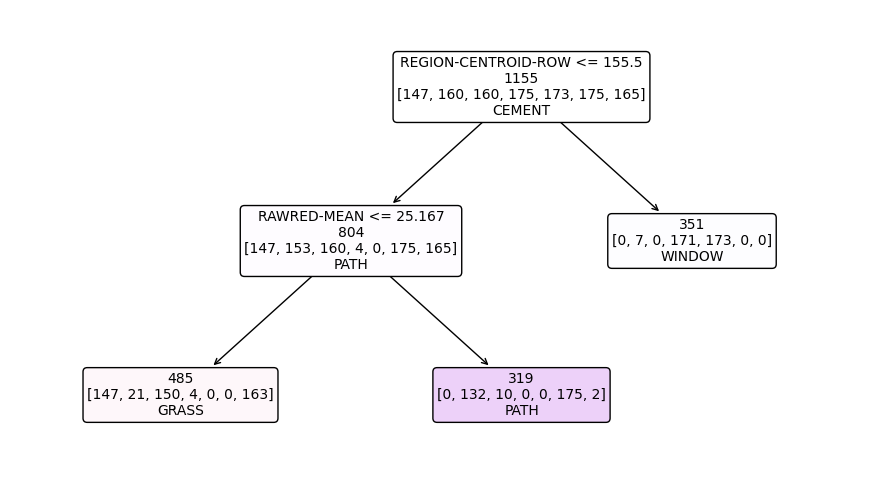

In [1500]:
plt.figure(figsize=(11,6)) #diatur ukuran figur

tree.plot_tree(p_tree, fontsize=10, feature_names=feature_names,
                      class_names=['BRICKFACE','SKY', 'FOLIAGE',
                                   'CEMENT','WINDOW','PATH','GRASS'],
                      label= 'none', filled=True, impurity= False,
               rounded= True) #dibuat plot tree

In [1501]:
fi = p_tree.feature_importances_ #membuat importance pada fitur p_tree
for fi_val, f_name in zip (fi, feature_names): #dilakukan looping untuk mengetahui importance fitur
  print(" %4.2f %s " % (fi_val, f_name)) #ditampilkan importance fitur

 0.00 REGION-CENTROID-COL 
 0.61 REGION-CENTROID-ROW 
 0.00 REGION-PIXEL-COUNT 
 0.00 SHORT-LINE-DENSITY-5 
 0.00 SHORT-LINE-DENSITY-2 
 0.00 VEDGE-MEAN 
 0.00 VEDGE-SD 
 0.00 HEDGE-MEAN 
 0.00 HEDGE-SD 
 0.00 INTENSITY-MEAN 
 0.39 RAWRED-MEAN 
 0.00 RAWBLUE-MEAN 
 0.00 RAWGREEN-MEAN 
 0.00 EXRED-MEAN 
 0.00 EXBLUE-MEAN 
 0.00 EXGREEN-MEAN 
 0.00 VALUE-MEAN 
 0.00 SATURATION-MEAN 
 0.00 HUE-MEAN 


**Hasil dak Kesimpulan**

Dari Hasil Decision tree dan pruned tree, diperoelh analisis:

  Saat kita membangun model decision tree, didapatkan bahwa jumlah leaf node sebanyak 49, dimana memiliki importance fitur tertinggi pada fitur REGION-CENTROID-ROW sebesar 0.31, karena itulah fitur  REGION-CENTROID-ROW berada dipuncak decision tree karena memiliki pengaruh tertinggi dalam terciptanya keputusan daripada fitur lain, pada decision tree memiliki akurasi sebesar 0.96 .

  Ketika membangun model pruneed tree, didapatkan importance fitur tertinggi berada pada fitur REGION-CENTROID-ROW sebesr 0.61  karena itulah fitur  REGION-CENTROID-ROW berada dipuncak decision tree karena memiliki pengaruh tertinggi dalam terciptanya keputusan daripada fitur lain, pada pruned tree memiliki akurasi sebesar 0.99 .

Kesimpulan:

  Sehingga dari kedua model decision tree, didapatkan bahwa fitur REGION-CENTROID-ROW memiliki pengaruh besar dikedua model dalam mengembangkan fitur seleksi, namun pada pruned tree memiliki akurasi yang sangat tinggi dalam menentukan fitur untuk fitur seleksi, sehingga bisa dijadikan sebagai subset fitur yang optimal sesuai kriteria

# **Soal E: Metode Permutation Feature Importance dan Wrapper**

[link Dataset digunakan](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records)

## Permutation Feature Importance

In [1502]:
import pandas as pd #untuk memanipulasi data
import numpy as np #untuk komputasional numerik
from sklearn.inspection import permutation_importance #untuk mengetahui importance permutasi
from sklearn import preprocessing #untuk melakukan prepocessing
from sklearn.metrics import accuracy_score #untuk menghitung skor akurasi
from sklearn.model_selection import cross_val_score  #untuk menghitung skor CV
from sklearn.neighbors import KNeighborsClassifier #untuk melakukan klasifikasi kNN
from sklearn.model_selection import train_test_split # untuk melakukan split data
import matplotlib.pyplot as plt #untuk memvsiualisasikan model/plot

In [1503]:
heart_failure = pd.read_csv('heart_failure_clinical_records_dataset.csv') #import file datset
heart_failure.dropna(axis= 0, inplace= True) #dilakukan drop pada data yang memiliki nilai Nan
print(heart_failure.shape) #ditampilikan dimensi data
heart_failure.head() #ditampilkan beberapa baris isi dataset

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [1504]:
#Split data
y = heart_failure.pop('diabetes').values #dilakukan penghapusan pada fitur time
X = heart_failure #merupakan data ion

ion_scaler = preprocessing.MinMaxScaler().fit(X) #dilakukan preprocessing penskalaan fitur pada x
X_scaled = ion_scaler.transform(X) #dilakukan transform pada ion_scaler dengan X
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, random_state=2, test_size=1/2) #dilakukan split data

In [1505]:
#Final results dataframe
res_df = pd.DataFrame([['All Features',0.0,0.0],['After Pi',0.0,0.0]
                       ,['After Wrapper',0.0,0.0]], columns=['Method','X-Val','Hold-Out']) #dibuat dataframe hasil
res_df.set_index('Method', inplace= True) #diatur index dataframe

In [1506]:
#Akurasi
kNN = KNeighborsClassifier(n_neighbors=3) #dilakukan klasifikasi kNN dengan n neighbors=3
kNN= kNN.fit(X_train, y_train) #dilakukan training model kNN dengan data train
y_pred= kNN.predict(X_test) #dilakukan prediksi kNN dengan X_test
acc = accuracy_score(y_pred, y_test) #dihitung skor akurasi dengan argumen y_pred dan y_test
cv_acc= cross_val_score(kNN, X_train, y_train, cv=8) #dihitung skor CV dengan argumen kNN, X_train, y_train, cv=8

res_df.loc['All Features']['X-Val']= cv_acc.mean() # pada fitur All Features & X-Val merupakan nilai mean cv_acc
res_df.loc['All Features']['Hold Out']= acc #pada fitur All Features & Hold Out merupakan nilai acc

print("X_Val on training all features: {0:.3f}".format(cv_acc.mean())) #menampilkan nilai X validation ditrain disemua fitur
print("Hold Out testing all features: {0:.3f}".format(acc)) #menampilkan holdout ditesting pada semua fitur

X_Val on training all features: 0.543
Hold Out testing all features: 0.587


Permutation feature importance stage

In [1507]:
knn_perm= permutation_importance(kNN, X_train, y_train, n_repeats=10, random_state=0) #menampilkan Permuation Importance dengan banyak repeats=10

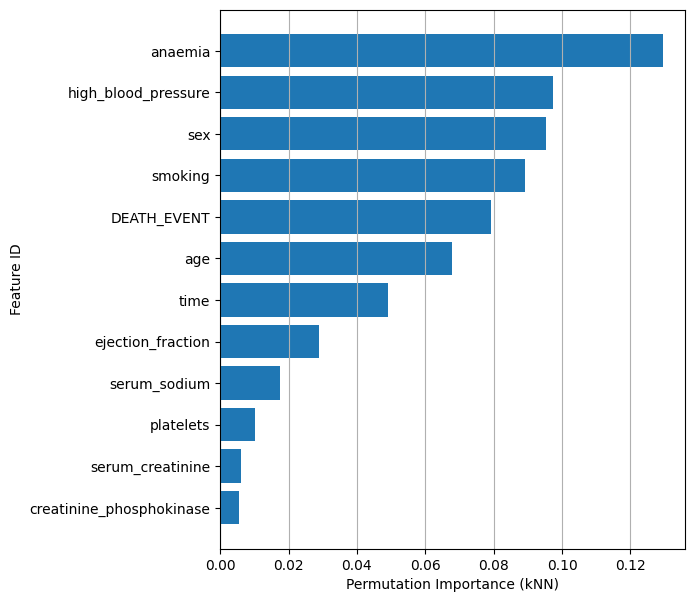

In [1508]:
sorted_idx= knn_perm.importances_mean.argsort() #dihitung nilai mean importance kNN_perm dengan diurutkan
fig, ax = plt.subplots(figsize=(6,7)) #diatur figur dan axis
ax.barh(heart_failure.columns[sorted_idx], knn_perm.importances_mean[sorted_idx], zorder=1) #mengatur bar horizontal
ax.xaxis.grid(True) #memberikan grid pda axis x
ax.set_ylabel('Feature ID') #mengatur label y
ax.set_xlabel('Permutation Importance (kNN)') #mengatur label x
ax.figure.savefig('Piscores.png') #menyimpan figur

In [1509]:
mask= knn_perm.importances_mean[sorted_idx]>0 #membuat mask untuk memilih fitur importance lebih dari satu

In [1510]:
PI_features= heart_failure.columns[sorted_idx][mask] #membuat PI fitur berdasarkan fitur sorted_idx & mask

In [1511]:
X_PI= X[PI_features] #membuat X pi
print("Permutation Importance selects", X_PI.shape[1], "features.") #ditampilkan nilai importance permutasi dipilih
X_PI_scaled = preprocessing.MinMaxScaler().fit_transform(X_PI) #dilakukan prepocessing penskalaan fitur pada X_PI
X_PI_train, X_PI_test, y_PI_train, y_PI_test= train_test_split(X_PI_scaled, y
                                                               , random_state=2,
                                                               test_size=1/2) #dilakukan split data

Permutation Importance selects 12 features.


In [1512]:
#Hitung kembali Akurasi

knnPI= KNeighborsClassifier(n_neighbors=3) #dilakukan klasifikasi kNN dengan n neigbors yaitu 3
knnPI= knnPI.fit(X_PI_train, y_PI_train) #dilakukan training model dengan data PI_train

y_pred_PI = knnPI.predict(X_PI_test) #dilakukan prediksi dengan X_Pi_test
acc_PI = accuracy_score(y_pred_PI, y_test) #dihitung skor akurasi dengan y_pred_Pi & y_test
cv_acc_PI = cross_val_score(knnPI, X_PI_train, y_train, cv=8) #dihtiung skor CV

res_df.loc['After Pi']['X-Val']= cv_acc_PI.mean() #hsil dataframe fitur After Pi & X-Val adalah mean dari cv_acc_PI
res_df.loc['After Pi']['Hold-Out']= acc_PI  #hsil dataframe fitur After Pi & Hold Out  adalah acc_PI

print('x_val on training PI features: {0:.3f}'.format(cv_acc_PI.mean())) #menampilkan x validation training fitur PI
print('hold out testing PI features: {0:.3f}'.format(acc_PI)) #menampilkan Hold out testing fitur Pi

x_val on training PI features: 0.543
hold out testing PI features: 0.587


## Wrapper

In [1513]:
from sklearn.feature_selection import SequentialFeatureSelector #untuk seleksi fitur
from sklearn.neighbors import KNeighborsClassifier #untuk melakukan klasifikasi kNN
knn = KNeighborsClassifier(n_neighbors=3) #dilakukan klasifikasi kNN dengan n neighbros =3
sfs= SequentialFeatureSelector(knn, n_features_to_select='auto',direction='backward',
                               cv=10, tol=0.00001) #dilakukan seleksi fitur dengan mengunakan direksi backward dengan cv=10, dan toleransi 0.00001 dan fitur dipilih automatis
sfs.fit(X_PI_train, y_train) #dilakukan train model sfs dengan data train
X_PI_W_train= sfs.transform(X_PI_train) #dilakukan transform sfs dengan X_PI_train
X_PI_W_test= sfs.transform(X_PI_test) #dilakukan transform sfs dengan X_PI_test

In [1514]:
knnPIW= KNeighborsClassifier(n_neighbors=3) #dilakukan klasifikasi kNN dengan n neigbors= 3
knnPIW= knnPIW.fit(X_PI_W_train, y_PI_train) #dilakukan train model dengan data train
print(X_PI_W_train.shape) #menampilkan dimensi data X_PI_W_train
knnPIW.score(X_PI_W_test, y_PI_test) #menampilkan skor knnPIW

(149, 7)


0.52

In [1515]:
#hitungakurasi
knnPIW= KNeighborsClassifier(n_neighbors=3) #dilakukan klasifikasi kNN dengan n neigbors= 3
knnPIW= knnPIW.fit(X_PI_W_train, y_PI_train) #dilakukan training model knnPIW dengan megnunakan data train
print(X_PI_W_train.shape) #menampilkan dimensi data X_PI_W_train

y_pred_PIW = knnPIW.predict(X_PI_W_test) #dilakukan prediksi dengan X_PI_W_est
acc_PIW = accuracy_score(y_pred_PIW, y_PI_test) #dihitung skor akurasi dengan
cv_acc_PIW = cross_val_score(knnPIW, X_PI_W_train, y_train, cv=8) #y_pred_PIW, y_PI_test

res_df.loc['After Wrapper']['X-Val']= cv_acc_PIW.mean() #hasil dataframe fitur After Wrapper & X-Val adalah mean dari cv_acc_PIW
res_df.loc['After Wrapper']['Hold-Out']= acc_PIW #hasil dataframe fitur After Wrapper & X-Val adalah mean dari cv_acc_PIW

print('x_val on training PI features: {0:.3f}'.format(cv_acc_PIW.mean())) #menampilkan x validation training fitur PI
print('hold out testing PI features: {0:.3f}'.format(acc_PIW)) #menampilkan holdout testing fitur PI

(149, 7)
x_val on training PI features: 0.630
hold out testing PI features: 0.520


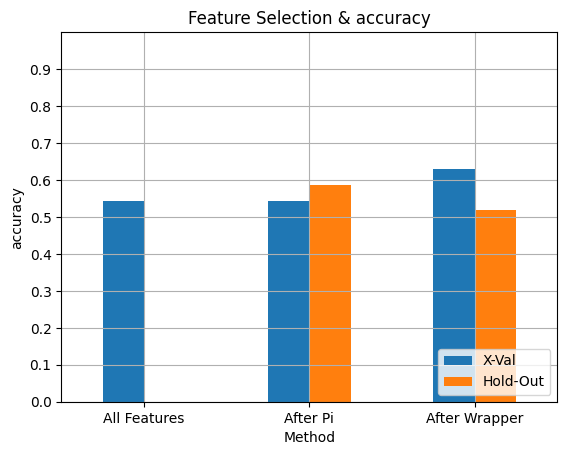

In [1516]:
#plot
ax= res_df.plot.bar(rot=0) #diatur bar plot
ax.set_ylabel("accuracy") #diatur y label
ax.set_title("Feature Selection & accuracy") #diatur judul plot
ax.set_ylim(0,1) #diatur batas sumbu y
ax.set_yticks(np.arange(0,1,0.1)) #diatur titik y dengan range 0, 1, 0.1
ax.legend(loc='lower right') #diatur posisi legend di kanan bwah
ax.grid(True) #diatur grid axis
ax.figure.savefig("PI+wrapper.png") #disimpan figur

**Hasil & Kesimpulan**


Dari Metode Permutation feature dan wraper:
bahwa didapatkan nilai akurasi Cv(x-val) pada metode wraper lebih besar dari metode permutation feature dimana dengan persentase masing-masing  63% dan 54.3%.

pada nilai akurasi holdout, permutation feature memiliki persentase akurasi lebih besar dari wraper dengan masing masing 58.7% dan 52%

Sehingga bisa kita simpulkan dengan berdasarkan plot "Feature Selection & accuracy". Bahwa untuk semua fitur, metode wrapper sangat bagus dalam subset fitur yang optimal, walaupun ketika setelah mengunakan metode permutation juga memiliki akurasi dan ketika mengunakan metode wraper juga tinggi, namun jika secara keseluruhan fitur, model wrapper adalah yang sangat cocok

